#BGPT

## Dutch-English/English-Dutch

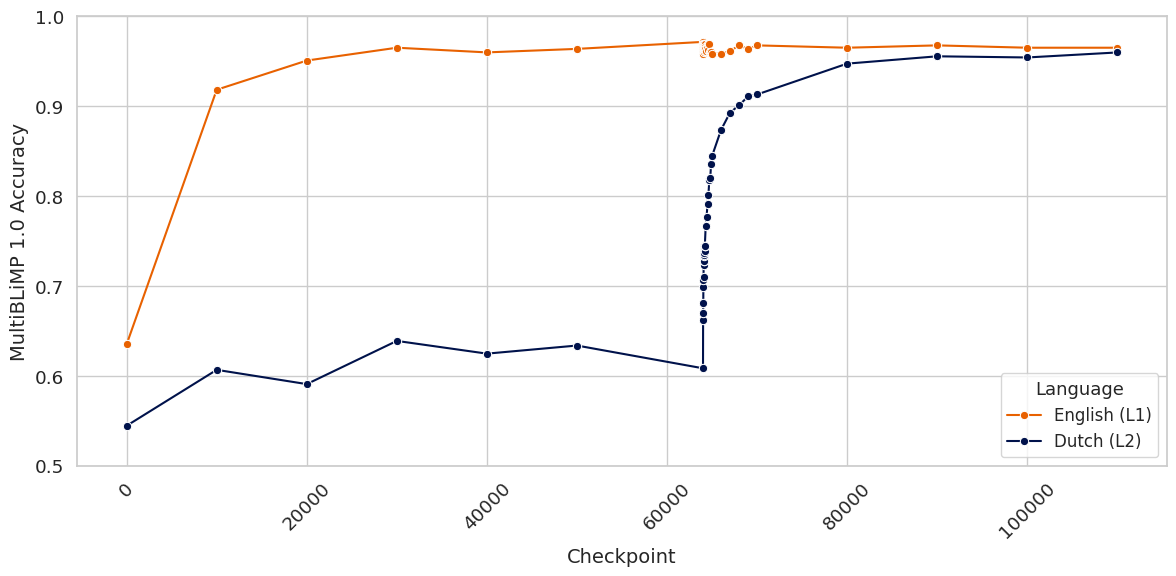

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_en_nl_simultaneous,0,eng,nld,simultaneous,0.6350649350649351,0.5444015444015444
catherinearnett/B-GPT_en_nl_simultaneous,10000,eng,nld,simultaneous,0.9181818181818182,0.6066066066066066
catherinearnett/B-GPT_en_nl_simultaneous,20000,eng,nld,simultaneous,0.9506493506493506,0.5907335907335908
catherinearnett/B-GPT_en_nl_simultaneous,30000,eng,nld,simultaneous,0.964935064935065,0.6387816387816387
catherinearnett/B-GPT_en_nl_simultaneous,40000,eng,nld,simultaneous,0.9597402597402598,0.6246246246246246
catherinearnett/B-GPT_en_nl_simultaneous,50000,eng,nld,simultaneous,0.9636363636363636,0.6336336336336337
catherinearnett/B-GPT_en_nl_simultaneous,64000,eng,nld,simultaneous,0.9714285714285714,0.6083226083226083
catherinearnett/B-GPT_en_nl_simultaneous,64010,eng,nld,simultaneous,0.9688311688311688,0.6615186615186616
catherinearnett/B-GPT_en_nl_simultaneous,64020,eng,nld,simultaneous,0.9662337662337662,0.6696696696696697
catherinearnett/B-GPT_en_nl_simultaneous,64030,eng,nld,simultaneous,0.9623376623376624,0.6812526812526812
catherinearnett/B-GPT_en_nl_simultaneous,64040,eng,nld,simultaneous,0.961038961038961,0.6992706992706993
catherinearnett/B-GPT_en_nl_simultaneous,64050,eng,nld,simultaneous,0.9584415584415584,0.706992706992707
catherinearnett/B-GPT_en_nl_simultaneous,64060,eng,nld,simultaneous,0.961038961038961,0.7095667095667095
catherinearnett/B-GPT_en_nl_simultaneous,64070,eng,nld,simultaneous,0.961038961038961,0.7228657228657228
catherinearnett/B-GPT_en_nl_simultaneous,64080,eng,nld,simultaneous,0.961038961038961,0.728013728013728
catherinearnett/B-GPT_en_nl_simultaneous,64090,eng,nld,simultaneous,0.9597402597402598,0.7301587301587301
catherinearnett/B-GPT_en_nl_simultaneous,64100,eng,nld,simultaneous,0.964935064935065,0.7318747318747318
catherinearnett/B-GPT_en_nl_simultaneous,64110,eng,nld,simultaneous,0.9662337662337662,0.7271557271557272
catherinearnett/B-GPT_en_nl_simultaneous,64120,eng,nld,simultaneous,0.9675324675324676,0.7327327327327328
catherinearnett/B-GPT_en_nl_simultaneous,64130,eng,nld,simultaneous,0.9675324675324676,0.734019734019734
catherinearnett/B-GPT_en_nl_simultaneous,64140,eng,nld,simultaneous,0.9688311688311688,0.7438867438867439
catherinearnett/B-GPT_en_nl_simultaneous,64150,eng,nld,simultaneous,0.9675324675324676,0.7383097383097383
catherinearnett/B-GPT_en_nl_simultaneous,64160,eng,nld,simultaneous,0.9688311688311688,0.7361647361647362
catherinearnett/B-GPT_en_nl_simultaneous,64170,eng,nld,simultaneous,0.9688311688311688,0.7383097383097383
catherinearnett/B-GPT_en_nl_simultaneous,64180,eng,nld,simultaneous,0.9662337662337662,0.7443157443157443
catherinearnett/B-GPT_en_nl_simultaneous,64190,eng,nld,simultaneous,0.961038961038961,0.7443157443157443
catherinearnett/B-GPT_en_nl_simultaneous,64200,eng,nld,simultaneous,0.9636363636363636,0.7443157443157443
catherinearnett/B-GPT_en_nl_simultaneous,64300,eng,nld,simultaneous,0.961038961038961,0.767052767052767
catherinearnett/B-GPT_en_nl_simultaneous,64400,eng,nld,simultaneous,0.9662337662337662,0.7769197769197769
catherinearnett/B-GPT_en_nl_simultaneous,64500,eng,nld,simultaneous,0.9688311688311688,0.7915057915057915
catherinearnett/B-GPT_en_nl_simultaneous,64600,eng,nld,simultaneous,0.9623376623376624,0.8009438009438009
catherinearnett/B-GPT_en_nl_simultaneous,64700,eng,nld,simultaneous,0.9688311688311688,0.8181038181038182
catherinearnett/B-GPT_en_nl_simultaneous,64800,eng,nld,simultaneous,0.9597402597402598,0.8198198198198198
catherinearnett/B-GPT_en_nl_simultaneous,64900,eng,nld,simultaneous,0.9597402597402598,0.8356928356928357
catherinearnett/B-GPT_en_nl_simultaneous,65000,eng,nld,simultaneous,0.9584415584415584,0.8442728442728443
catherinearnett/B-GPT_en_nl_simultaneous,66000,eng,nld,simultaneous,0.9584415584415584,0.8734448734448734
catherinearnett/B-GPT_en_nl_simultaneous,67000,eng,nld,simultaneous,0.961038961038961,0.8927498927498928
catherinearnett/B-GPT_en_nl_simultaneous,68000,eng,nld,simultaneous,0.9675324675324676,0.9009009009009009
catherinearnett/B-GPT_en_nl_simultaneous,69000,eng,nld,simultaneous,0.9636363636363636,0.9107679107679107
catherinearnett/B-GPT_en_nl_simultaneous,70000,eng,nld,simultaneous,0.9675324675324676,0.9129129129129129
catherinearnett/B-GPT_en_nl_simultaneous,80000,eng,nld,simultaneous,0.964935064935065,0.9472329472329473
catherinearnett/B-GPT_en_nl_simultaneous,90000,eng,nld,simultaneous,0.9675324675324676,0.9553839553839554
catherinearnett/B-GPT_en_nl_simultaneous,100000,eng,nld,simultaneous,0.964935064935065,0.954096954096954
catherinearnett/B-GPT_en_nl_simultaneous,110000,eng,nld,simultaneous,0.964935064935065,0.9596739596739596
"""
# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "English (L1)", "l2_acc": "Dutch (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "English (L1)": "#E86100",
    "Dutch (L2)": "#00124B",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_en_nl_simultaneous.png")
plt.show()


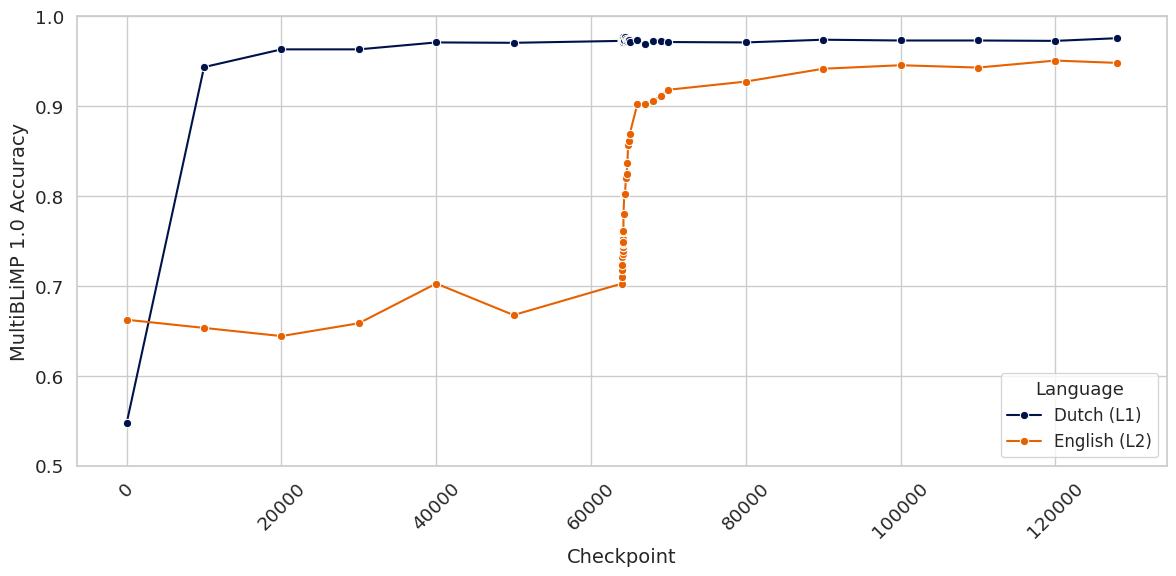

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_nl_en_simultaneous,0,nld,eng,simultaneous,0.5474045474045474,0.6623376623376623
catherinearnett/B-GPT_nl_en_simultaneous,10000,nld,eng,simultaneous,0.9433719433719434,0.6532467532467533
catherinearnett/B-GPT_nl_en_simultaneous,20000,nld,eng,simultaneous,0.9631059631059631,0.6441558441558441
catherinearnett/B-GPT_nl_en_simultaneous,30000,nld,eng,simultaneous,0.9631059631059631,0.6584415584415585
catherinearnett/B-GPT_nl_en_simultaneous,40000,nld,eng,simultaneous,0.9708279708279708,0.7025974025974026
catherinearnett/B-GPT_nl_en_simultaneous,50000,nld,eng,simultaneous,0.9703989703989704,0.6675324675324675
catherinearnett/B-GPT_nl_en_simultaneous,64000,nld,eng,simultaneous,0.9725439725439725,0.7025974025974026
catherinearnett/B-GPT_nl_en_simultaneous,64010,nld,eng,simultaneous,0.9734019734019734,0.7103896103896103
catherinearnett/B-GPT_nl_en_simultaneous,64020,nld,eng,simultaneous,0.9716859716859717,0.7181818181818181
catherinearnett/B-GPT_nl_en_simultaneous,64030,nld,eng,simultaneous,0.9712569712569713,0.7337662337662337
catherinearnett/B-GPT_nl_en_simultaneous,64040,nld,eng,simultaneous,0.9725439725439725,0.7246753246753247
catherinearnett/B-GPT_nl_en_simultaneous,64050,nld,eng,simultaneous,0.9734019734019734,0.7324675324675325
catherinearnett/B-GPT_nl_en_simultaneous,64060,nld,eng,simultaneous,0.972972972972973,0.7233766233766233
catherinearnett/B-GPT_nl_en_simultaneous,64070,nld,eng,simultaneous,0.9742599742599742,0.7402597402597403
catherinearnett/B-GPT_nl_en_simultaneous,64080,nld,eng,simultaneous,0.9746889746889746,0.7376623376623377
catherinearnett/B-GPT_nl_en_simultaneous,64090,nld,eng,simultaneous,0.9725439725439725,0.7350649350649351
catherinearnett/B-GPT_nl_en_simultaneous,64100,nld,eng,simultaneous,0.975975975975976,0.7389610389610389
catherinearnett/B-GPT_nl_en_simultaneous,64110,nld,eng,simultaneous,0.9746889746889746,0.7428571428571429
catherinearnett/B-GPT_nl_en_simultaneous,64120,nld,eng,simultaneous,0.975975975975976,0.7428571428571429
catherinearnett/B-GPT_nl_en_simultaneous,64130,nld,eng,simultaneous,0.9716859716859717,0.7467532467532467
catherinearnett/B-GPT_nl_en_simultaneous,64140,nld,eng,simultaneous,0.9746889746889746,0.7480519480519481
catherinearnett/B-GPT_nl_en_simultaneous,64150,nld,eng,simultaneous,0.9751179751179752,0.7519480519480519
catherinearnett/B-GPT_nl_en_simultaneous,64160,nld,eng,simultaneous,0.9764049764049764,0.7493506493506493
catherinearnett/B-GPT_nl_en_simultaneous,64170,nld,eng,simultaneous,0.9746889746889746,0.7597402597402597
catherinearnett/B-GPT_nl_en_simultaneous,64180,nld,eng,simultaneous,0.972972972972973,0.7597402597402597
catherinearnett/B-GPT_nl_en_simultaneous,64190,nld,eng,simultaneous,0.9742599742599742,0.7610389610389611
catherinearnett/B-GPT_nl_en_simultaneous,64200,nld,eng,simultaneous,0.9721149721149721,0.7805194805194805
catherinearnett/B-GPT_nl_en_simultaneous,64300,nld,eng,simultaneous,0.9734019734019734,0.8025974025974026
catherinearnett/B-GPT_nl_en_simultaneous,64400,nld,eng,simultaneous,0.9772629772629773,0.8025974025974026
catherinearnett/B-GPT_nl_en_simultaneous,64500,nld,eng,simultaneous,0.9751179751179752,0.8194805194805195
catherinearnett/B-GPT_nl_en_simultaneous,64600,nld,eng,simultaneous,0.9738309738309738,0.8246753246753247
catherinearnett/B-GPT_nl_en_simultaneous,64700,nld,eng,simultaneous,0.9725439725439725,0.8363636363636363
catherinearnett/B-GPT_nl_en_simultaneous,64800,nld,eng,simultaneous,0.972972972972973,0.8571428571428571
catherinearnett/B-GPT_nl_en_simultaneous,64900,nld,eng,simultaneous,0.972972972972973,0.861038961038961
catherinearnett/B-GPT_nl_en_simultaneous,65000,nld,eng,simultaneous,0.9716859716859717,0.8688311688311688
catherinearnett/B-GPT_nl_en_simultaneous,66000,nld,eng,simultaneous,0.9738309738309738,0.9025974025974026
catherinearnett/B-GPT_nl_en_simultaneous,67000,nld,eng,simultaneous,0.9686829686829687,0.9025974025974026
catherinearnett/B-GPT_nl_en_simultaneous,68000,nld,eng,simultaneous,0.9721149721149721,0.9051948051948052
catherinearnett/B-GPT_nl_en_simultaneous,69000,nld,eng,simultaneous,0.9725439725439725,0.9116883116883117
catherinearnett/B-GPT_nl_en_simultaneous,70000,nld,eng,simultaneous,0.9712569712569713,0.9181818181818182
catherinearnett/B-GPT_nl_en_simultaneous,80000,nld,eng,simultaneous,0.9708279708279708,0.9272727272727272
catherinearnett/B-GPT_nl_en_simultaneous,90000,nld,eng,simultaneous,0.9738309738309738,0.9415584415584416
catherinearnett/B-GPT_nl_en_simultaneous,100000,nld,eng,simultaneous,0.972972972972973,0.9454545454545454
catherinearnett/B-GPT_nl_en_simultaneous,110000,nld,eng,simultaneous,0.972972972972973,0.9428571428571428
catherinearnett/B-GPT_nl_en_simultaneous,120000,nld,eng,simultaneous,0.9725439725439725,0.9506493506493506
catherinearnett/B-GPT_nl_en_simultaneous,128000,nld,eng,simultaneous,0.9755469755469756,0.948051948051948
"""


# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "Dutch (L1)", "l2_acc": "English (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "Dutch (L1)":"#00124B",
    "English (L2)": "#E86100",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_nl_en_simultaneous.png")
plt.show()


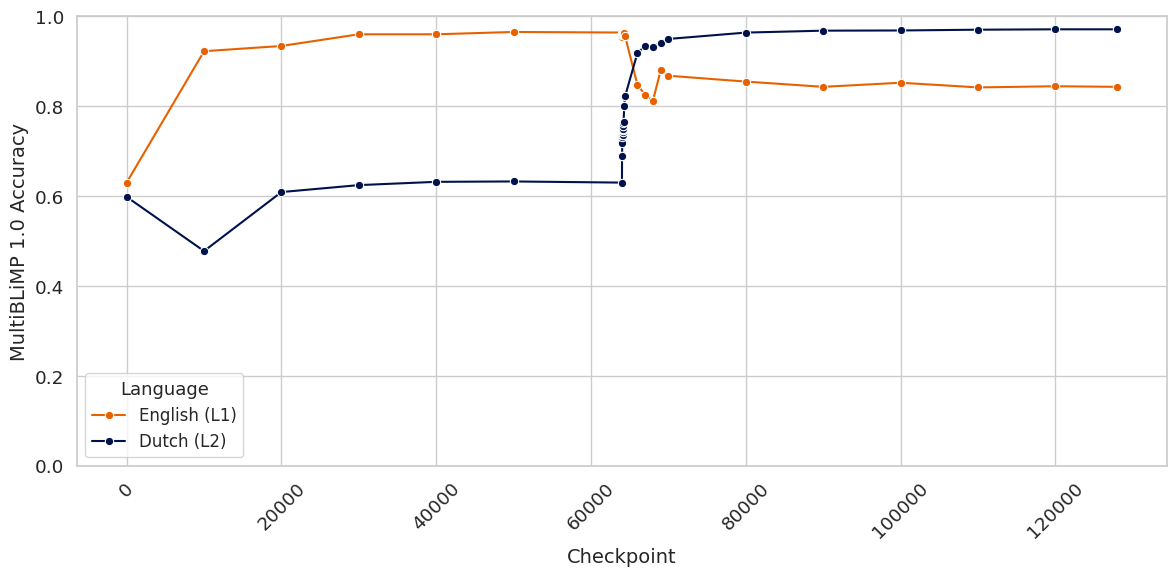

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_en_nl_sequential,0,eng,nld,sequential,0.6298701298701299,0.5980265980265981
catherinearnett/B-GPT_en_nl_sequential,10000,eng,nld,sequential,0.922077922077922,0.4774774774774775
catherinearnett/B-GPT_en_nl_sequential,20000,eng,nld,sequential,0.9337662337662338,0.6087516087516087
catherinearnett/B-GPT_en_nl_sequential,30000,eng,nld,sequential,0.9597402597402598,0.6241956241956242
catherinearnett/B-GPT_en_nl_sequential,40000,eng,nld,sequential,0.9597402597402598,0.6314886314886314
catherinearnett/B-GPT_en_nl_sequential,50000,eng,nld,sequential,0.964935064935065,0.6323466323466324
catherinearnett/B-GPT_en_nl_sequential,64000,eng,nld,sequential,0.9636363636363636,0.6297726297726298
catherinearnett/B-GPT_en_nl_sequential,64010,eng,nld,sequential,0.961038961038961,0.6889746889746889
catherinearnett/B-GPT_en_nl_sequential,64020,eng,nld,sequential,0.9571428571428572,0.6885456885456885
catherinearnett/B-GPT_en_nl_sequential,64030,eng,nld,sequential,0.9558441558441558,0.7177177177177178
catherinearnett/B-GPT_en_nl_sequential,64040,eng,nld,sequential,0.9545454545454546,0.7305877305877306
catherinearnett/B-GPT_en_nl_sequential,64050,eng,nld,sequential,0.9584415584415584,0.7365937365937366
catherinearnett/B-GPT_en_nl_sequential,64060,eng,nld,sequential,0.961038961038961,0.7348777348777349
catherinearnett/B-GPT_en_nl_sequential,64070,eng,nld,sequential,0.9623376623376624,0.7365937365937366
catherinearnett/B-GPT_en_nl_sequential,64080,eng,nld,sequential,0.9584415584415584,0.743028743028743
catherinearnett/B-GPT_en_nl_sequential,64090,eng,nld,sequential,0.9623376623376624,0.7421707421707422
catherinearnett/B-GPT_en_nl_sequential,64100,eng,nld,sequential,0.9623376623376624,0.7468897468897469
catherinearnett/B-GPT_en_nl_sequential,64110,eng,nld,sequential,0.9623376623376624,0.7464607464607464
catherinearnett/B-GPT_en_nl_sequential,64120,eng,nld,sequential,0.9636363636363636,0.7498927498927499
catherinearnett/B-GPT_en_nl_sequential,64130,eng,nld,sequential,0.9584415584415584,0.7494637494637495
catherinearnett/B-GPT_en_nl_sequential,64140,eng,nld,sequential,0.961038961038961,0.758043758043758
catherinearnett/B-GPT_en_nl_sequential,64150,eng,nld,sequential,0.961038961038961,0.7601887601887601
catherinearnett/B-GPT_en_nl_sequential,64160,eng,nld,sequential,0.9597402597402598,0.7494637494637495
catherinearnett/B-GPT_en_nl_sequential,64170,eng,nld,sequential,0.961038961038961,0.7563277563277563
catherinearnett/B-GPT_en_nl_sequential,64180,eng,nld,sequential,0.9623376623376624,0.7567567567567568
catherinearnett/B-GPT_en_nl_sequential,64190,eng,nld,sequential,0.9623376623376624,0.7631917631917632
catherinearnett/B-GPT_en_nl_sequential,64200,eng,nld,sequential,0.9623376623376624,0.7636207636207636
catherinearnett/B-GPT_en_nl_sequential,64300,eng,nld,sequential,0.9623376623376624,0.7996567996567997
catherinearnett/B-GPT_en_nl_sequential,64400,eng,nld,sequential,0.9558441558441558,0.8215358215358215
catherinearnett/B-GPT_en_nl_sequential,66000,nld,eng,sequential,0.8472758472758473,0.9181818181818182
catherinearnett/B-GPT_en_nl_sequential,67000,nld,eng,sequential,0.824967824967825,0.9337662337662338
catherinearnett/B-GPT_en_nl_sequential,68000,nld,eng,sequential,0.8120978120978121,0.9324675324675324
catherinearnett/B-GPT_en_nl_sequential,69000,eng,nld,sequential,0.8792207792207792,0.9403689403689404
catherinearnett/B-GPT_en_nl_sequential,70000,eng,nld,sequential,0.8675324675324675,0.9493779493779494
catherinearnett/B-GPT_en_nl_sequential,80000,eng,nld,sequential,0.8545454545454545,0.9635349635349635
catherinearnett/B-GPT_en_nl_sequential,90000,eng,nld,sequential,0.8428571428571429,0.9678249678249679
catherinearnett/B-GPT_en_nl_sequential,100000,eng,nld,sequential,0.8519480519480519,0.9682539682539683
catherinearnett/B-GPT_en_nl_sequential,110000,eng,nld,sequential,0.8415584415584415,0.96996996996997
catherinearnett/B-GPT_en_nl_sequential,120000,eng,nld,sequential,0.8441558441558441,0.9708279708279708
catherinearnett/B-GPT_en_nl_sequential,128000,eng,nld,sequential,0.8428571428571429,0.9708279708279708
"""



# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "English (L1)", "l2_acc": "Dutch (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "English (L1)": "#E86100" ,
    "Dutch (L2)": "#00124B",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_en_nl_sequential.png")
plt.show()



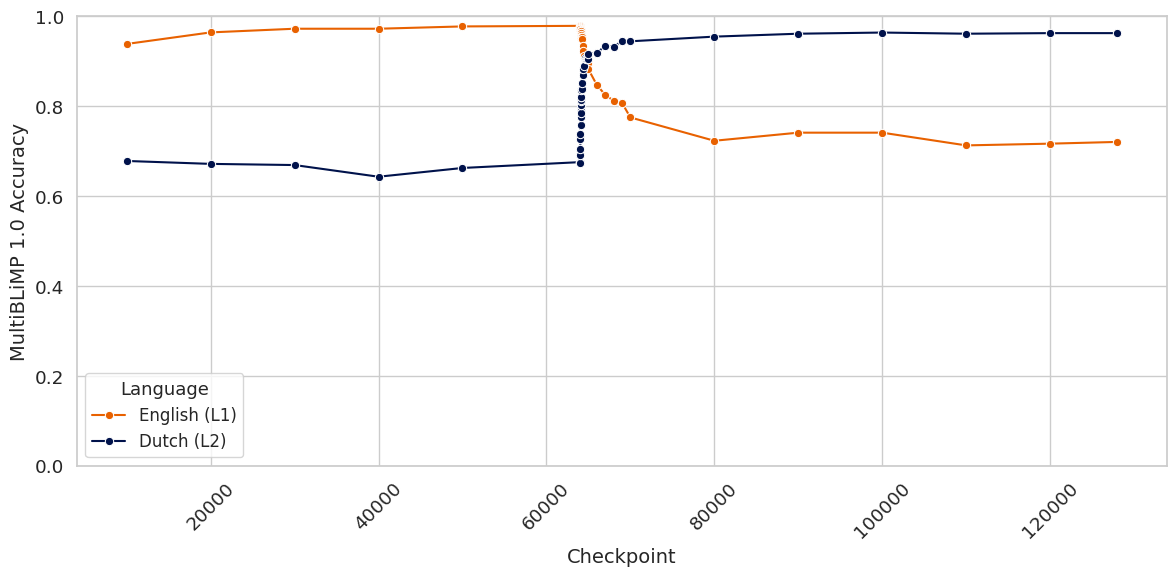

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_nl_en_sequential,10000,nld,eng,sequential,0.9382239382239382,0.6779220779220779
catherinearnett/B-GPT_nl_en_sequential,20000,nld,eng,sequential,0.963963963963964,0.6714285714285714
catherinearnett/B-GPT_nl_en_sequential,30000,nld,eng,sequential,0.9721149721149721,0.6688311688311688
catherinearnett/B-GPT_nl_en_sequential,40000,nld,eng,sequential,0.9721149721149721,0.6428571428571429
catherinearnett/B-GPT_nl_en_sequential,50000,nld,eng,sequential,0.9772629772629773,0.6623376623376623
catherinearnett/B-GPT_nl_en_sequential,64000,nld,eng,sequential,0.9785499785499786,0.6753246753246753
catherinearnett/B-GPT_nl_en_sequential,64010,nld,eng,sequential,0.9776919776919777,0.6753246753246753
catherinearnett/B-GPT_nl_en_sequential,64020,nld,eng,sequential,0.9751179751179752,0.674025974025974
catherinearnett/B-GPT_nl_en_sequential,64030,nld,eng,sequential,0.972972972972973,0.6922077922077922
catherinearnett/B-GPT_nl_en_sequential,64040,nld,eng,sequential,0.9716859716859717,0.7038961038961039
catherinearnett/B-GPT_nl_en_sequential,64050,nld,eng,sequential,0.9712569712569713,0.7259740259740259
catherinearnett/B-GPT_nl_en_sequential,64060,nld,eng,sequential,0.9725439725439725,0.7389610389610389
catherinearnett/B-GPT_nl_en_sequential,64070,nld,eng,sequential,0.9695409695409696,0.7571428571428571
catherinearnett/B-GPT_nl_en_sequential,64080,nld,eng,sequential,0.9656799656799657,0.7766233766233767
catherinearnett/B-GPT_nl_en_sequential,64090,nld,eng,sequential,0.9661089661089661,0.7909090909090909
catherinearnett/B-GPT_nl_en_sequential,64100,nld,eng,sequential,0.9665379665379665,0.7857142857142857
catherinearnett/B-GPT_nl_en_sequential,64110,nld,eng,sequential,0.9635349635349635,0.8025974025974026
catherinearnett/B-GPT_nl_en_sequential,64120,nld,eng,sequential,0.9605319605319605,0.8038961038961039
catherinearnett/B-GPT_nl_en_sequential,64130,nld,eng,sequential,0.9622479622479623,0.8025974025974026
catherinearnett/B-GPT_nl_en_sequential,64140,nld,eng,sequential,0.9562419562419563,0.8103896103896104
catherinearnett/B-GPT_nl_en_sequential,64150,nld,eng,sequential,0.9575289575289575,0.8142857142857143
catherinearnett/B-GPT_nl_en_sequential,64160,nld,eng,sequential,0.9536679536679536,0.8207792207792208
catherinearnett/B-GPT_nl_en_sequential,64170,nld,eng,sequential,0.9536679536679536,0.8194805194805195
catherinearnett/B-GPT_nl_en_sequential,64180,nld,eng,sequential,0.9519519519519519,0.8363636363636363
catherinearnett/B-GPT_nl_en_sequential,64190,nld,eng,sequential,0.9528099528099528,0.8376623376623377
catherinearnett/B-GPT_nl_en_sequential,64200,nld,eng,sequential,0.9498069498069498,0.8506493506493507
catherinearnett/B-GPT_nl_en_sequential,64300,nld,eng,sequential,0.9330759330759331,0.8688311688311688
catherinearnett/B-GPT_nl_en_sequential,64400,nld,eng,sequential,0.9232089232089232,0.8818181818181818
catherinearnett/B-GPT_nl_en_sequential,64500,nld,eng,sequential,0.9116259116259117,0.8896103896103896
catherinearnett/B-GPT_nl_en_sequential,64600,nld,eng,sequential,0.9056199056199056,0.9064935064935065
catherinearnett/B-GPT_nl_en_sequential,64700,nld,eng,sequential,0.903045903045903,0.9038961038961039
catherinearnett/B-GPT_nl_en_sequential,64800,nld,eng,sequential,0.894036894036894,0.9051948051948052
catherinearnett/B-GPT_nl_en_sequential,64900,nld,eng,sequential,0.8953238953238953,0.9051948051948052
catherinearnett/B-GPT_nl_en_sequential,65000,nld,eng,sequential,0.882024882024882,0.9168831168831169
catherinearnett/B-GPT_nl_en_sequential,66000,nld,eng,sequential,0.8472758472758473,0.9181818181818182
catherinearnett/B-GPT_nl_en_sequential,67000,nld,eng,sequential,0.824967824967825,0.9337662337662338
catherinearnett/B-GPT_nl_en_sequential,68000,nld,eng,sequential,0.8120978120978121,0.9324675324675324
catherinearnett/B-GPT_nl_en_sequential,69000,nld,eng,sequential,0.8073788073788074,0.9441558441558442
catherinearnett/B-GPT_nl_en_sequential,70000,nld,eng,sequential,0.7747747747747747,0.9441558441558442
catherinearnett/B-GPT_nl_en_sequential,80000,nld,eng,sequential,0.7228657228657228,0.9545454545454546
catherinearnett/B-GPT_nl_en_sequential,90000,nld,eng,sequential,0.7408837408837409,0.961038961038961
catherinearnett/B-GPT_nl_en_sequential,100000,nld,eng,sequential,0.7408837408837409,0.9636363636363636
catherinearnett/B-GPT_nl_en_sequential,110000,nld,eng,sequential,0.7125697125697126,0.961038961038961
catherinearnett/B-GPT_nl_en_sequential,120000,nld,eng,sequential,0.7164307164307164,0.9623376623376624
catherinearnett/B-GPT_nl_en_sequential,128000,nld,eng,sequential,0.7202917202917203,0.9623376623376624
"""



# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "English (L1)", "l2_acc": "Dutch (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "English (L1)": "#E86100" ,
    "Dutch (L2)": "#00124B",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_nl_en_sequential.png")
plt.show()




## English-Spanish

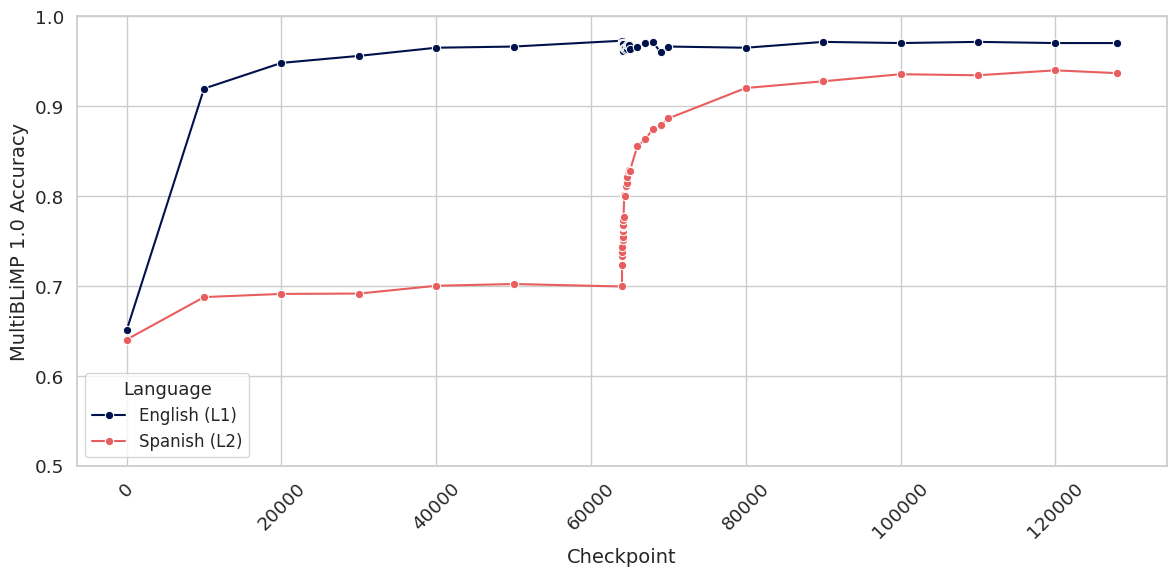

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_en_es_simultaneous,0,eng,spa,simultaneous,0.6506493506493507,0.6402990948445494
catherinearnett/B-GPT_en_es_simultaneous,10000,eng,spa,simultaneous,0.9194805194805195,0.6875245966155057
catherinearnett/B-GPT_en_es_simultaneous,20000,eng,spa,simultaneous,0.948051948051948,0.6910665092483275
catherinearnett/B-GPT_en_es_simultaneous,30000,eng,spa,simultaneous,0.9558441558441558,0.6914600550964187
catherinearnett/B-GPT_en_es_simultaneous,40000,eng,spa,simultaneous,0.964935064935065,0.7001180637544274
catherinearnett/B-GPT_en_es_simultaneous,50000,eng,spa,simultaneous,0.9662337662337662,0.7020857929948839
catherinearnett/B-GPT_en_es_simultaneous,64000,eng,spa,simultaneous,0.9727272727272728,0.6993309720582448
catherinearnett/B-GPT_en_es_simultaneous,64010,eng,spa,simultaneous,0.9688311688311688,0.7237308146399055
catherinearnett/B-GPT_en_es_simultaneous,64020,eng,spa,simultaneous,0.9701298701298702,0.7351436442345534
catherinearnett/B-GPT_en_es_simultaneous,64030,eng,spa,simultaneous,0.9675324675324676,0.7331759149940968
catherinearnett/B-GPT_en_es_simultaneous,64040,eng,spa,simultaneous,0.9688311688311688,0.7378984651711924
catherinearnett/B-GPT_en_es_simultaneous,64050,eng,spa,simultaneous,0.964935064935065,0.7441951987406533
catherinearnett/B-GPT_en_es_simultaneous,64060,eng,spa,simultaneous,0.9688311688311688,0.7430145611963794
catherinearnett/B-GPT_en_es_simultaneous,64070,eng,spa,simultaneous,0.9688311688311688,0.7504919323101141
catherinearnett/B-GPT_en_es_simultaneous,64080,eng,spa,simultaneous,0.9701298701298702,0.7540338449429359
catherinearnett/B-GPT_en_es_simultaneous,64090,eng,spa,simultaneous,0.964935064935065,0.7560015741833923
catherinearnett/B-GPT_en_es_simultaneous,64100,eng,spa,simultaneous,0.9688311688311688,0.7548209366391184
catherinearnett/B-GPT_en_es_simultaneous,64110,eng,spa,simultaneous,0.9675324675324676,0.7595434868162141
catherinearnett/B-GPT_en_es_simultaneous,64120,eng,spa,simultaneous,0.9701298701298702,0.7544273907910272
catherinearnett/B-GPT_en_es_simultaneous,64130,eng,spa,simultaneous,0.9688311688311688,0.7662337662337663
catherinearnett/B-GPT_en_es_simultaneous,64140,eng,spa,simultaneous,0.9688311688311688,0.7615112160566706
catherinearnett/B-GPT_en_es_simultaneous,64150,eng,spa,simultaneous,0.964935064935065,0.7650531286894924
catherinearnett/B-GPT_en_es_simultaneous,64160,eng,spa,simultaneous,0.9636363636363636,0.7662337662337663
catherinearnett/B-GPT_en_es_simultaneous,64170,eng,spa,simultaneous,0.9688311688311688,0.7666273120818575
catherinearnett/B-GPT_en_es_simultaneous,64180,eng,spa,simultaneous,0.9636363636363636,0.7682014954742228
catherinearnett/B-GPT_en_es_simultaneous,64190,eng,spa,simultaneous,0.961038961038961,0.7729240456513183
catherinearnett/B-GPT_en_es_simultaneous,64200,eng,spa,simultaneous,0.964935064935065,0.7760724124360489
catherinearnett/B-GPT_en_es_simultaneous,64300,eng,spa,simultaneous,0.964935064935065,0.8012593467138922
catherinearnett/B-GPT_en_es_simultaneous,64400,eng,spa,simultaneous,0.964935064935065,0.8004722550177096
catherinearnett/B-GPT_en_es_simultaneous,64500,eng,spa,simultaneous,0.9623376623376624,0.8107044470680834
catherinearnett/B-GPT_en_es_simultaneous,64600,eng,spa,simultaneous,0.9636363636363636,0.8146399055489965
catherinearnett/B-GPT_en_es_simultaneous,64700,eng,spa,simultaneous,0.9675324675324676,0.8213301849665486
catherinearnett/B-GPT_en_es_simultaneous,64800,eng,spa,simultaneous,0.9675324675324676,0.8276269185360094
catherinearnett/B-GPT_en_es_simultaneous,64900,eng,spa,simultaneous,0.9675324675324676,0.8288075560802833
catherinearnett/B-GPT_en_es_simultaneous,65000,eng,spa,simultaneous,0.9636363636363636,0.8276269185360094
catherinearnett/B-GPT_en_es_simultaneous,66000,eng,spa,simultaneous,0.9662337662337662,0.855568673750492
catherinearnett/B-GPT_en_es_simultaneous,67000,eng,spa,simultaneous,0.9701298701298702,0.8630460448642266
catherinearnett/B-GPT_en_es_simultaneous,68000,eng,spa,simultaneous,0.9714285714285714,0.8744588744588745
catherinearnett/B-GPT_en_es_simultaneous,69000,eng,spa,simultaneous,0.9597402597402598,0.8787878787878788
catherinearnett/B-GPT_en_es_simultaneous,70000,eng,spa,simultaneous,0.9662337662337662,0.8862652499016135
catherinearnett/B-GPT_en_es_simultaneous,80000,eng,spa,simultaneous,0.964935064935065,0.9201101928374655
catherinearnett/B-GPT_en_es_simultaneous,90000,eng,spa,simultaneous,0.9714285714285714,0.9275875639512003
catherinearnett/B-GPT_en_es_simultaneous,100000,eng,spa,simultaneous,0.9701298701298702,0.9354584809130264
catherinearnett/B-GPT_en_es_simultaneous,110000,eng,spa,simultaneous,0.9714285714285714,0.9342778433687524
catherinearnett/B-GPT_en_es_simultaneous,120000,eng,spa,simultaneous,0.9701298701298702,0.9397874852420307
catherinearnett/B-GPT_en_es_simultaneous,128000,eng,spa,simultaneous,0.9701298701298702,0.9366391184573003
"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "English (L1)", "l2_acc": "Spanish (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "English (L1)": "#00124B",
    "Spanish (L2)": "#E85D5E"
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_en_es_simultaneous.png")
plt.show()

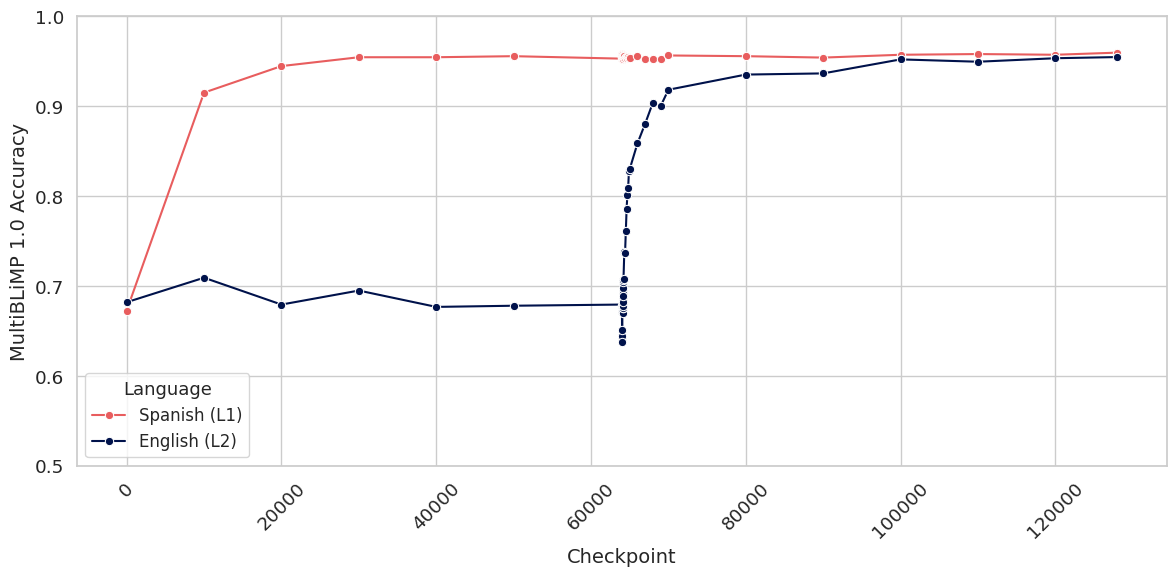

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_es_en_simultaneous,0,spa,eng,simultaneous,0.6725698543880362,0.6818181818181818
catherinearnett/B-GPT_es_en_simultaneous,10000,spa,eng,simultaneous,0.9149940968122786,0.7090909090909091
catherinearnett/B-GPT_es_en_simultaneous,20000,spa,eng,simultaneous,0.9445100354191264,0.6792207792207792
catherinearnett/B-GPT_es_en_simultaneous,30000,spa,eng,simultaneous,0.9543486816214088,0.6948051948051948
catherinearnett/B-GPT_es_en_simultaneous,40000,spa,eng,simultaneous,0.9543486816214088,0.6766233766233766
catherinearnett/B-GPT_es_en_simultaneous,50000,spa,eng,simultaneous,0.9555293191656828,0.6779220779220779
catherinearnett/B-GPT_es_en_simultaneous,64000,spa,eng,simultaneous,0.9527744982290437,0.6792207792207792
catherinearnett/B-GPT_es_en_simultaneous,64010,spa,eng,simultaneous,0.9559228650137741,0.6415584415584416
catherinearnett/B-GPT_es_en_simultaneous,64020,spa,eng,simultaneous,0.9582841401023219,0.6441558441558441
catherinearnett/B-GPT_es_en_simultaneous,64030,spa,eng,simultaneous,0.9563164108618654,0.6376623376623377
catherinearnett/B-GPT_es_en_simultaneous,64040,spa,eng,simultaneous,0.9551357733175915,0.6506493506493507
catherinearnett/B-GPT_es_en_simultaneous,64050,spa,eng,simultaneous,0.9567099567099567,0.6779220779220779
catherinearnett/B-GPT_es_en_simultaneous,64060,spa,eng,simultaneous,0.9551357733175915,0.6714285714285714
catherinearnett/B-GPT_es_en_simultaneous,64070,spa,eng,simultaneous,0.9551357733175915,0.6922077922077922
catherinearnett/B-GPT_es_en_simultaneous,64080,spa,eng,simultaneous,0.9543486816214088,0.6701298701298701
catherinearnett/B-GPT_es_en_simultaneous,64090,spa,eng,simultaneous,0.9555293191656828,0.6753246753246753
catherinearnett/B-GPT_es_en_simultaneous,64100,spa,eng,simultaneous,0.9551357733175915,0.6831168831168831
catherinearnett/B-GPT_es_en_simultaneous,64110,spa,eng,simultaneous,0.9555293191656828,0.6753246753246753
catherinearnett/B-GPT_es_en_simultaneous,64120,spa,eng,simultaneous,0.9559228650137741,0.6857142857142857
catherinearnett/B-GPT_es_en_simultaneous,64130,spa,eng,simultaneous,0.9523809523809523,0.6779220779220779
catherinearnett/B-GPT_es_en_simultaneous,64140,spa,eng,simultaneous,0.9535615899252263,0.687012987012987
catherinearnett/B-GPT_es_en_simultaneous,64150,spa,eng,simultaneous,0.9559228650137741,0.6818181818181818
catherinearnett/B-GPT_es_en_simultaneous,64160,spa,eng,simultaneous,0.9555293191656828,0.6974025974025974
catherinearnett/B-GPT_es_en_simultaneous,64170,spa,eng,simultaneous,0.9547422274695002,0.6883116883116883
catherinearnett/B-GPT_es_en_simultaneous,64180,spa,eng,simultaneous,0.953168044077135,0.7038961038961039
catherinearnett/B-GPT_es_en_simultaneous,64190,spa,eng,simultaneous,0.9527744982290437,0.7064935064935065
catherinearnett/B-GPT_es_en_simultaneous,64200,spa,eng,simultaneous,0.953168044077135,0.7077922077922078
catherinearnett/B-GPT_es_en_simultaneous,64300,spa,eng,simultaneous,0.9555293191656828,0.7376623376623377
catherinearnett/B-GPT_es_en_simultaneous,64400,spa,eng,simultaneous,0.9535615899252263,0.7363636363636363
catherinearnett/B-GPT_es_en_simultaneous,64500,spa,eng,simultaneous,0.9543486816214088,0.7610389610389611
catherinearnett/B-GPT_es_en_simultaneous,64600,spa,eng,simultaneous,0.9543486816214088,0.7857142857142857
catherinearnett/B-GPT_es_en_simultaneous,64700,spa,eng,simultaneous,0.953168044077135,0.8012987012987013
catherinearnett/B-GPT_es_en_simultaneous,64800,spa,eng,simultaneous,0.9551357733175915,0.8090909090909091
catherinearnett/B-GPT_es_en_simultaneous,64900,spa,eng,simultaneous,0.953168044077135,0.8272727272727273
catherinearnett/B-GPT_es_en_simultaneous,65000,spa,eng,simultaneous,0.9539551357733176,0.8298701298701299
catherinearnett/B-GPT_es_en_simultaneous,66000,spa,eng,simultaneous,0.9559228650137741,0.8584415584415584
catherinearnett/B-GPT_es_en_simultaneous,67000,spa,eng,simultaneous,0.9527744982290437,0.8805194805194805
catherinearnett/B-GPT_es_en_simultaneous,68000,spa,eng,simultaneous,0.9527744982290437,0.9038961038961039
catherinearnett/B-GPT_es_en_simultaneous,69000,spa,eng,simultaneous,0.9523809523809523,0.9
catherinearnett/B-GPT_es_en_simultaneous,70000,spa,eng,simultaneous,0.9563164108618654,0.9181818181818182
catherinearnett/B-GPT_es_en_simultaneous,80000,spa,eng,simultaneous,0.9555293191656828,0.935064935064935
catherinearnett/B-GPT_es_en_simultaneous,90000,spa,eng,simultaneous,0.9539551357733176,0.9363636363636364
catherinearnett/B-GPT_es_en_simultaneous,100000,spa,eng,simultaneous,0.957103502558048,0.951948051948052
catherinearnett/B-GPT_es_en_simultaneous,110000,spa,eng,simultaneous,0.9578905942542306,0.9493506493506494
catherinearnett/B-GPT_es_en_simultaneous,120000,spa,eng,simultaneous,0.957103502558048,0.9532467532467532
catherinearnett/B-GPT_es_en_simultaneous,128000,spa,eng,simultaneous,0.9594647776465959,0.9545454545454546
"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "Spanish (L1)", "l2_acc": "English (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "Spanish (L1)": "#E85D5E",
    "English (L2)": "#00124B",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_es_en_simultaneous.png")
plt.show()

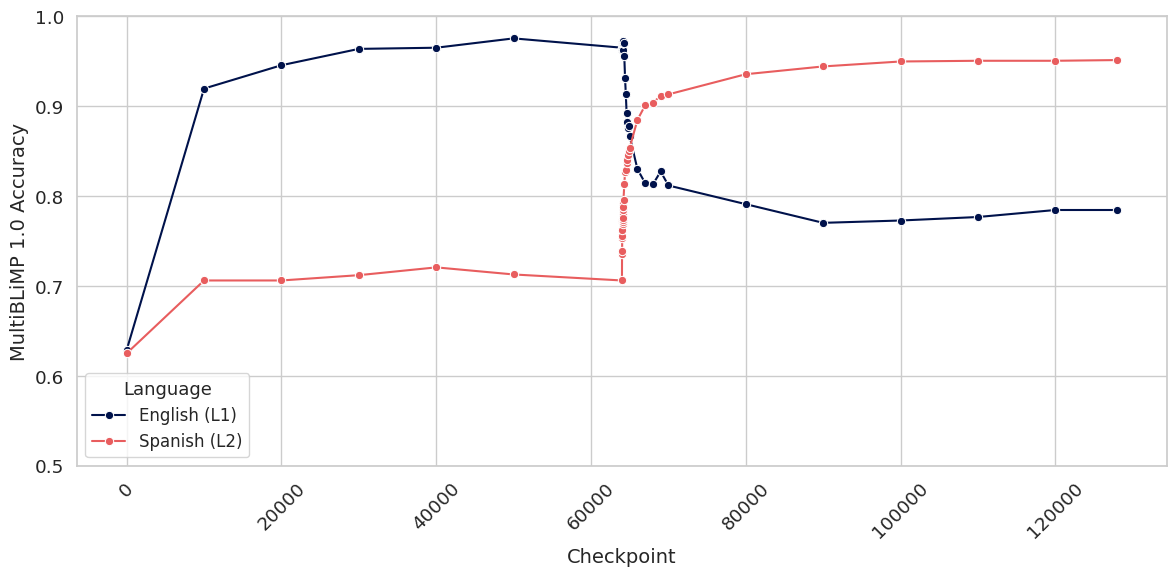

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_en_es_sequential,0,eng,spa,sequential,0.6285714285714286,0.6249508067689886
catherinearnett/B-GPT_en_es_sequential,10000,eng,spa,sequential,0.9194805194805195,0.706021251475797
catherinearnett/B-GPT_en_es_sequential,20000,eng,spa,sequential,0.9454545454545454,0.706021251475797
catherinearnett/B-GPT_en_es_sequential,30000,eng,spa,sequential,0.9636363636363636,0.7119244391971665
catherinearnett/B-GPT_en_es_sequential,40000,eng,spa,sequential,0.964935064935065,0.7205824478551751
catherinearnett/B-GPT_en_es_sequential,50000,eng,spa,sequential,0.9753246753246754,0.712711530893349
catherinearnett/B-GPT_en_es_sequential,64000,eng,spa,sequential,0.964935064935065,0.706021251475797
catherinearnett/B-GPT_en_es_sequential,64010,eng,spa,sequential,0.9701298701298702,0.7351436442345534
catherinearnett/B-GPT_en_es_sequential,64020,eng,spa,sequential,0.9636363636363636,0.738685556867375
catherinearnett/B-GPT_en_es_sequential,64030,eng,spa,sequential,0.964935064935065,0.7532467532467533
catherinearnett/B-GPT_en_es_sequential,64040,eng,spa,sequential,0.9636363636363636,0.7552144824872098
catherinearnett/B-GPT_en_es_sequential,64050,eng,spa,sequential,0.9636363636363636,0.7619047619047619
catherinearnett/B-GPT_en_es_sequential,64060,eng,spa,sequential,0.9623376623376624,0.7725304998032271
catherinearnett/B-GPT_en_es_sequential,64070,eng,spa,sequential,0.961038961038961,0.7693821330184967
catherinearnett/B-GPT_en_es_sequential,64080,eng,spa,sequential,0.9623376623376624,0.7705627705627706
catherinearnett/B-GPT_en_es_sequential,64090,eng,spa,sequential,0.9714285714285714,0.7729240456513183
catherinearnett/B-GPT_en_es_sequential,64100,eng,spa,sequential,0.9714285714285714,0.7784336875245966
catherinearnett/B-GPT_en_es_sequential,64110,eng,spa,sequential,0.9701298701298702,0.7800078709169618
catherinearnett/B-GPT_en_es_sequential,64120,eng,spa,sequential,0.9701298701298702,0.7756788665879575
catherinearnett/B-GPT_en_es_sequential,64130,eng,spa,sequential,0.9701298701298702,0.7839433293978748
catherinearnett/B-GPT_en_es_sequential,64140,eng,spa,sequential,0.9701298701298702,0.7882723337268792
catherinearnett/B-GPT_en_es_sequential,64150,eng,spa,sequential,0.9701298701298702,0.7910271546635183
catherinearnett/B-GPT_en_es_sequential,64160,eng,spa,sequential,0.9701298701298702,0.7882723337268792
catherinearnett/B-GPT_en_es_sequential,64170,eng,spa,sequential,0.9701298701298702,0.7914207005116096
catherinearnett/B-GPT_en_es_sequential,64180,eng,spa,sequential,0.9701298701298702,0.7922077922077922
catherinearnett/B-GPT_en_es_sequential,64190,eng,spa,sequential,0.9727272727272728,0.7878787878787878
catherinearnett/B-GPT_en_es_sequential,64200,eng,spa,sequential,0.9701298701298702,0.7957497048406139
catherinearnett/B-GPT_en_es_sequential,64300,eng,spa,sequential,0.9558441558441558,0.8130657221566312
catherinearnett/B-GPT_en_es_sequential,64400,eng,spa,sequential,0.9311688311688312,0.8264462809917356
catherinearnett/B-GPT_en_es_sequential,64500,eng,spa,sequential,0.912987012987013,0.8284140102321921
catherinearnett/B-GPT_en_es_sequential,64600,eng,spa,sequential,0.8922077922077922,0.8370720188902007
catherinearnett/B-GPT_en_es_sequential,64700,eng,spa,sequential,0.8818181818181818,0.8398268398268398
catherinearnett/B-GPT_en_es_sequential,64800,eng,spa,sequential,0.8753246753246753,0.8453364817001181
catherinearnett/B-GPT_en_es_sequential,64900,eng,spa,sequential,0.8779220779220779,0.8500590318772137
catherinearnett/B-GPT_en_es_sequential,65000,eng,spa,sequential,0.8662337662337662,0.8536009445100354
catherinearnett/B-GPT_en_es_sequential,66000,eng,spa,sequential,0.8298701298701299,0.8846910665092483
catherinearnett/B-GPT_en_es_sequential,67000,eng,spa,sequential,0.8142857142857143,0.9008264462809917
catherinearnett/B-GPT_en_es_sequential,68000,eng,spa,sequential,0.812987012987013,0.9039748130657221
catherinearnett/B-GPT_en_es_sequential,69000,eng,spa,sequential,0.8272727272727273,0.9110586383313656
catherinearnett/B-GPT_en_es_sequential,70000,eng,spa,sequential,0.8116883116883117,0.9130263675718221
catherinearnett/B-GPT_en_es_sequential,80000,eng,spa,sequential,0.7909090909090909,0.9354584809130264
catherinearnett/B-GPT_en_es_sequential,90000,eng,spa,sequential,0.7701298701298701,0.944116489571035
catherinearnett/B-GPT_en_es_sequential,100000,eng,spa,sequential,0.7727272727272727,0.9496261314443133
catherinearnett/B-GPT_en_es_sequential,110000,eng,spa,sequential,0.7766233766233767,0.9504132231404959
catherinearnett/B-GPT_en_es_sequential,120000,eng,spa,sequential,0.7844155844155845,0.9504132231404959
catherinearnett/B-GPT_en_es_sequential,128000,eng,spa,sequential,0.7844155844155845,0.9512003148366784
"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "English (L1)", "l2_acc": "Spanish (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "English (L1)":"#00124B",
    "Spanish (L2)": "#E85D5E",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_en_es_sequential.png")
plt.show()






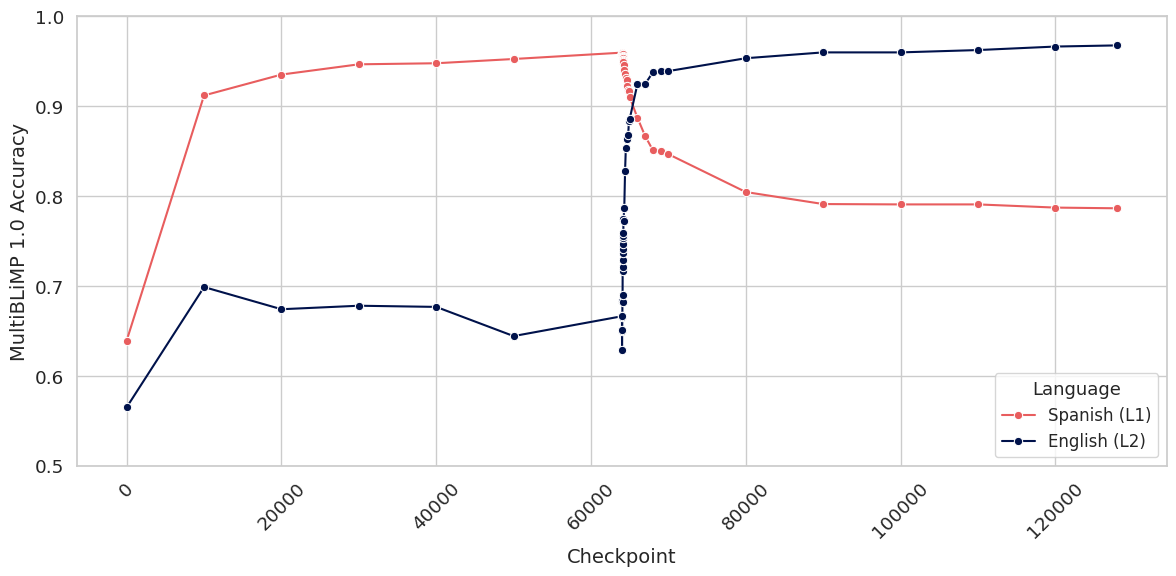

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_es_en_sequential,0,spa,eng,sequential,0.6391184573002755,0.564935064935065
catherinearnett/B-GPT_es_en_sequential,10000,spa,eng,sequential,0.9118457300275482,0.6987012987012987
catherinearnett/B-GPT_es_en_sequential,20000,spa,eng,sequential,0.935064935064935,0.674025974025974
catherinearnett/B-GPT_es_en_sequential,30000,spa,eng,sequential,0.9464777646595829,0.6779220779220779
catherinearnett/B-GPT_es_en_sequential,40000,spa,eng,sequential,0.9476584022038568,0.6766233766233766
catherinearnett/B-GPT_es_en_sequential,50000,spa,eng,sequential,0.9523809523809523,0.6441558441558441
catherinearnett/B-GPT_es_en_sequential,64000,spa,eng,sequential,0.9594647776465959,0.6662337662337663
catherinearnett/B-GPT_es_en_sequential,64010,spa,eng,sequential,0.9582841401023219,0.6285714285714286
catherinearnett/B-GPT_es_en_sequential,64020,spa,eng,sequential,0.9590712317985045,0.6493506493506493
catherinearnett/B-GPT_es_en_sequential,64030,spa,eng,sequential,0.9574970484061394,0.6506493506493507
catherinearnett/B-GPT_es_en_sequential,64040,spa,eng,sequential,0.9578905942542306,0.6649350649350649
catherinearnett/B-GPT_es_en_sequential,64050,spa,eng,sequential,0.9594647776465959,0.6662337662337663
catherinearnett/B-GPT_es_en_sequential,64060,spa,eng,sequential,0.9578905942542306,0.6831168831168831
catherinearnett/B-GPT_es_en_sequential,64070,spa,eng,sequential,0.9582841401023219,0.6818181818181818
catherinearnett/B-GPT_es_en_sequential,64080,spa,eng,sequential,0.9559228650137741,0.6896103896103896
catherinearnett/B-GPT_es_en_sequential,64090,spa,eng,sequential,0.9551357733175915,0.7168831168831169
catherinearnett/B-GPT_es_en_sequential,64100,spa,eng,sequential,0.9543486816214088,0.7207792207792207
catherinearnett/B-GPT_es_en_sequential,64110,spa,eng,sequential,0.9535615899252263,0.7285714285714285
catherinearnett/B-GPT_es_en_sequential,64120,spa,eng,sequential,0.9539551357733176,0.7454545454545455
catherinearnett/B-GPT_es_en_sequential,64130,spa,eng,sequential,0.9515938606847698,0.7363636363636363
catherinearnett/B-GPT_es_en_sequential,64140,spa,eng,sequential,0.9512003148366784,0.7415584415584415
catherinearnett/B-GPT_es_en_sequential,64150,spa,eng,sequential,0.9512003148366784,0.7467532467532467
catherinearnett/B-GPT_es_en_sequential,64160,spa,eng,sequential,0.9488390397481307,0.7532467532467533
catherinearnett/B-GPT_es_en_sequential,64170,spa,eng,sequential,0.9488390397481307,0.7558441558441559
catherinearnett/B-GPT_es_en_sequential,64180,spa,eng,sequential,0.9504132231404959,0.7584415584415585
catherinearnett/B-GPT_es_en_sequential,64190,spa,eng,sequential,0.9492325855962219,0.7740259740259741
catherinearnett/B-GPT_es_en_sequential,64200,spa,eng,sequential,0.9456906729634003,0.7727272727272727
catherinearnett/B-GPT_es_en_sequential,64300,spa,eng,sequential,0.9405745769382133,0.787012987012987
catherinearnett/B-GPT_es_en_sequential,64400,spa,eng,sequential,0.9354584809130264,0.8272727272727273
catherinearnett/B-GPT_es_en_sequential,64500,spa,eng,sequential,0.9307359307359307,0.8532467532467533
catherinearnett/B-GPT_es_en_sequential,64600,spa,eng,sequential,0.9287682014954742,0.8636363636363636
catherinearnett/B-GPT_es_en_sequential,64700,spa,eng,sequential,0.922077922077922,0.8636363636363636
catherinearnett/B-GPT_es_en_sequential,64800,spa,eng,sequential,0.918142463597009,0.8675324675324675
catherinearnett/B-GPT_es_en_sequential,64900,spa,eng,sequential,0.9169618260527351,0.8831168831168831
catherinearnett/B-GPT_es_en_sequential,65000,spa,eng,sequential,0.9098780007870917,0.8857142857142857
catherinearnett/B-GPT_es_en_sequential,66000,spa,eng,sequential,0.8870523415977961,0.9246753246753247
catherinearnett/B-GPT_es_en_sequential,67000,spa,eng,sequential,0.8665879574970484,0.9246753246753247
catherinearnett/B-GPT_es_en_sequential,68000,spa,eng,sequential,0.8508461235733963,0.9376623376623376
catherinearnett/B-GPT_es_en_sequential,69000,spa,eng,sequential,0.850452577725305,0.938961038961039
catherinearnett/B-GPT_es_en_sequential,70000,spa,eng,sequential,0.846517119244392,0.938961038961039
catherinearnett/B-GPT_es_en_sequential,80000,spa,eng,sequential,0.8044077134986226,0.9532467532467532
catherinearnett/B-GPT_es_en_sequential,90000,spa,eng,sequential,0.7910271546635183,0.9597402597402598
catherinearnett/B-GPT_es_en_sequential,100000,spa,eng,sequential,0.790633608815427,0.9597402597402598
catherinearnett/B-GPT_es_en_sequential,110000,spa,eng,sequential,0.790633608815427,0.9623376623376624
catherinearnett/B-GPT_es_en_sequential,120000,spa,eng,sequential,0.7870916961826053,0.9662337662337662
catherinearnett/B-GPT_es_en_sequential,128000,spa,eng,sequential,0.7863046044864227,0.9675324675324676
"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "Spanish (L1)", "l2_acc": "English (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "Spanish (L1)": "#E85D5E",
    "English (L2)": "#00124B",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_es_en_sequential.png")
plt.show()






## English-Greek

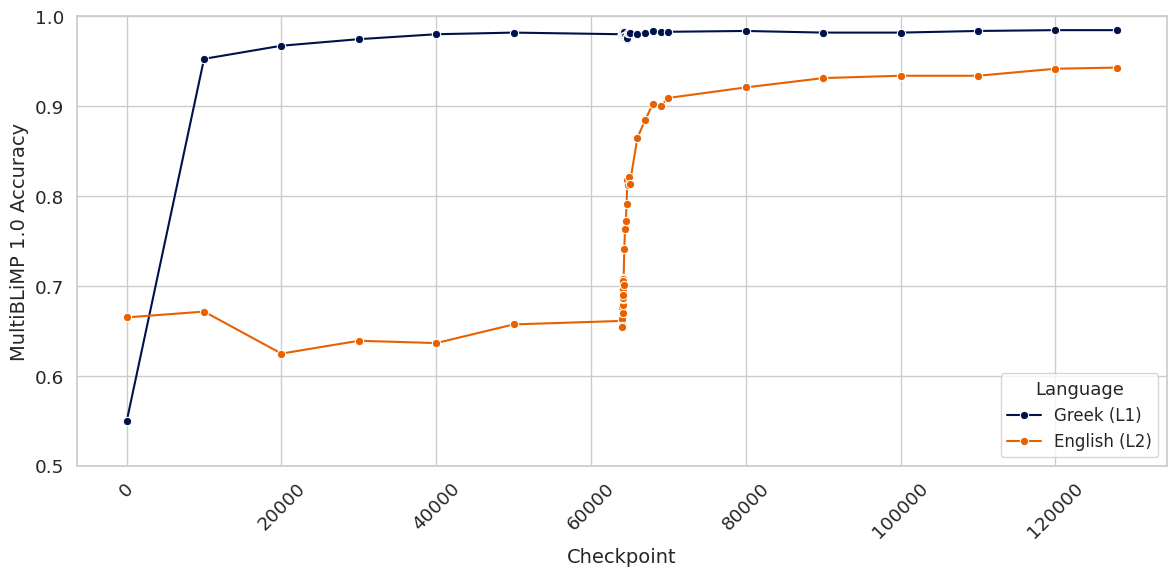

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_el_en_simultaneous,0,ell,eng,simultaneous,0.5492700729927007,0.6649350649350649
catherinearnett/B-GPT_el_en_simultaneous,10000,ell,eng,simultaneous,0.9525547445255474,0.6714285714285714
catherinearnett/B-GPT_el_en_simultaneous,20000,ell,eng,simultaneous,0.9671532846715328,0.6246753246753247
catherinearnett/B-GPT_el_en_simultaneous,30000,ell,eng,simultaneous,0.9744525547445255,0.638961038961039
catherinearnett/B-GPT_el_en_simultaneous,40000,ell,eng,simultaneous,0.9799270072992701,0.6363636363636364
catherinearnett/B-GPT_el_en_simultaneous,50000,ell,eng,simultaneous,0.9817518248175182,0.6571428571428571
catherinearnett/B-GPT_el_en_simultaneous,64000,ell,eng,simultaneous,0.9799270072992701,0.6610389610389611
catherinearnett/B-GPT_el_en_simultaneous,64010,ell,eng,simultaneous,0.9790145985401459,0.6766233766233766
catherinearnett/B-GPT_el_en_simultaneous,64020,ell,eng,simultaneous,0.9781021897810219,0.6584415584415585
catherinearnett/B-GPT_el_en_simultaneous,64030,ell,eng,simultaneous,0.9799270072992701,0.6571428571428571
catherinearnett/B-GPT_el_en_simultaneous,64040,ell,eng,simultaneous,0.9781021897810219,0.6636363636363637
catherinearnett/B-GPT_el_en_simultaneous,64050,ell,eng,simultaneous,0.9781021897810219,0.6558441558441559
catherinearnett/B-GPT_el_en_simultaneous,64060,ell,eng,simultaneous,0.9790145985401459,0.6545454545454545
catherinearnett/B-GPT_el_en_simultaneous,64070,ell,eng,simultaneous,0.9781021897810219,0.6701298701298701
catherinearnett/B-GPT_el_en_simultaneous,64080,ell,eng,simultaneous,0.9781021897810219,0.6792207792207792
catherinearnett/B-GPT_el_en_simultaneous,64090,ell,eng,simultaneous,0.9835766423357665,0.6857142857142857
catherinearnett/B-GPT_el_en_simultaneous,64110,ell,eng,simultaneous,0.9808394160583942,0.6935064935064935
catherinearnett/B-GPT_el_en_simultaneous,64120,ell,eng,simultaneous,0.9790145985401459,0.6961038961038961
catherinearnett/B-GPT_el_en_simultaneous,64130,ell,eng,simultaneous,0.9826642335766423,0.687012987012987
catherinearnett/B-GPT_el_en_simultaneous,64140,ell,eng,simultaneous,0.9808394160583942,0.6896103896103896
catherinearnett/B-GPT_el_en_simultaneous,64150,ell,eng,simultaneous,0.9808394160583942,0.7038961038961039
catherinearnett/B-GPT_el_en_simultaneous,64160,ell,eng,simultaneous,0.9808394160583942,0.7090909090909091
catherinearnett/B-GPT_el_en_simultaneous,64170,ell,eng,simultaneous,0.9826642335766423,0.7077922077922078
catherinearnett/B-GPT_el_en_simultaneous,64180,ell,eng,simultaneous,0.9826642335766423,0.7025974025974026
catherinearnett/B-GPT_el_en_simultaneous,64190,ell,eng,simultaneous,0.9817518248175182,0.7051948051948052
catherinearnett/B-GPT_el_en_simultaneous,64200,ell,eng,simultaneous,0.9826642335766423,0.7012987012987013
catherinearnett/B-GPT_el_en_simultaneous,64300,ell,eng,simultaneous,0.9781021897810219,0.7415584415584415
catherinearnett/B-GPT_el_en_simultaneous,64400,ell,eng,simultaneous,0.9781021897810219,0.7636363636363637
catherinearnett/B-GPT_el_en_simultaneous,64500,ell,eng,simultaneous,0.9762773722627737,0.7727272727272727
catherinearnett/B-GPT_el_en_simultaneous,64600,ell,eng,simultaneous,0.9744525547445255,0.7909090909090909
catherinearnett/B-GPT_el_en_simultaneous,64700,ell,eng,simultaneous,0.9753649635036497,0.8181818181818182
catherinearnett/B-GPT_el_en_simultaneous,64800,ell,eng,simultaneous,0.9817518248175182,0.8116883116883117
catherinearnett/B-GPT_el_en_simultaneous,64900,ell,eng,simultaneous,0.9808394160583942,0.8207792207792208
catherinearnett/B-GPT_el_en_simultaneous,65000,ell,eng,simultaneous,0.9808394160583942,0.812987012987013
catherinearnett/B-GPT_el_en_simultaneous,66000,ell,eng,simultaneous,0.9799270072992701,0.8649350649350649
catherinearnett/B-GPT_el_en_simultaneous,67000,ell,eng,simultaneous,0.9808394160583942,0.8844155844155844
catherinearnett/B-GPT_el_en_simultaneous,68000,ell,eng,simultaneous,0.9835766423357665,0.9025974025974026
catherinearnett/B-GPT_el_en_simultaneous,69000,ell,eng,simultaneous,0.9826642335766423,0.9
catherinearnett/B-GPT_el_en_simultaneous,70000,ell,eng,simultaneous,0.9826642335766423,0.9090909090909091
catherinearnett/B-GPT_el_en_simultaneous,80000,ell,eng,simultaneous,0.9835766423357665,0.9207792207792208
catherinearnett/B-GPT_el_en_simultaneous,90000,ell,eng,simultaneous,0.9817518248175182,0.9311688311688312
catherinearnett/B-GPT_el_en_simultaneous,100000,ell,eng,simultaneous,0.9817518248175182,0.9337662337662338
catherinearnett/B-GPT_el_en_simultaneous,110000,ell,eng,simultaneous,0.9835766423357665,0.9337662337662338
catherinearnett/B-GPT_el_en_simultaneous,120000,ell,eng,simultaneous,0.9844890510948905,0.9415584415584416
catherinearnett/B-GPT_el_en_simultaneous,128000,ell,eng,simultaneous,0.9844890510948905,0.9428571428571428
"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "Greek (L1)", "l2_acc": "English (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "Greek (L1)":"#00124B",
    "English (L2)": "#E86100",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_el_en_simultaneous.png")
plt.show()








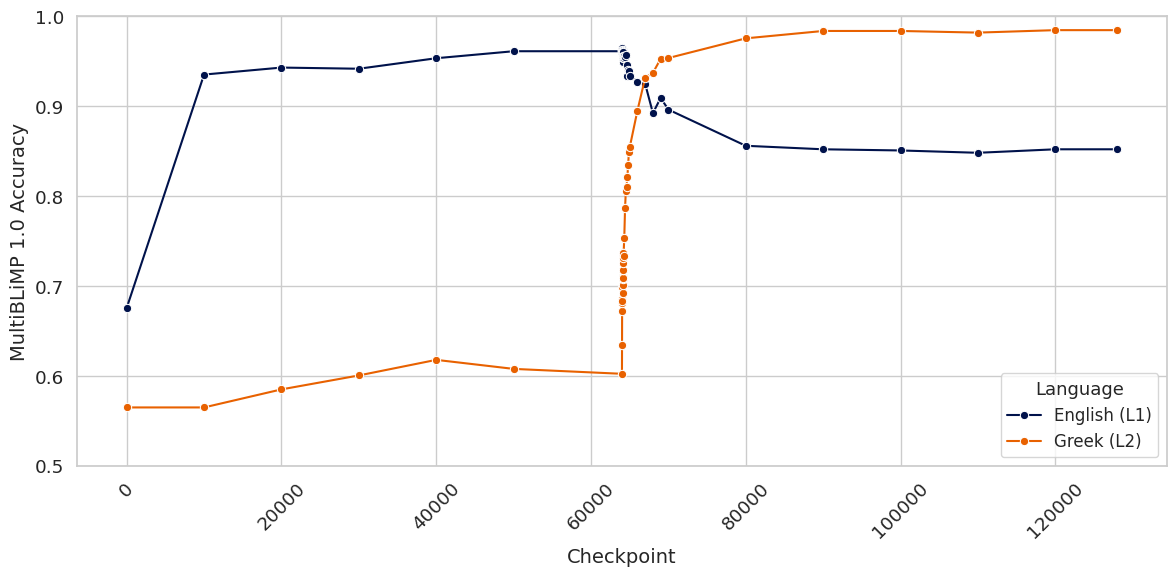

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_en_el_sequential,0,eng,ell,sequential,0.6753246753246753,0.5647810218978102
catherinearnett/B-GPT_en_el_sequential,10000,eng,ell,sequential,0.935064935064935,0.5647810218978102
catherinearnett/B-GPT_en_el_sequential,20000,eng,ell,sequential,0.9428571428571428,0.5848540145985401
catherinearnett/B-GPT_en_el_sequential,30000,eng,ell,sequential,0.9415584415584416,0.6003649635036497
catherinearnett/B-GPT_en_el_sequential,40000,eng,ell,sequential,0.9532467532467532,0.6177007299270073
catherinearnett/B-GPT_en_el_sequential,50000,eng,ell,sequential,0.961038961038961,0.6076642335766423
catherinearnett/B-GPT_en_el_sequential,64000,eng,ell,sequential,0.961038961038961,0.6021897810218978
catherinearnett/B-GPT_en_el_sequential,64010,eng,ell,sequential,0.9623376623376624,0.6341240875912408
catherinearnett/B-GPT_en_el_sequential,64020,eng,ell,sequential,0.9597402597402598,0.6724452554744526
catherinearnett/B-GPT_en_el_sequential,64030,eng,ell,sequential,0.9623376623376624,0.6806569343065694
catherinearnett/B-GPT_en_el_sequential,64040,eng,ell,sequential,0.964935064935065,0.6852189781021898
catherinearnett/B-GPT_en_el_sequential,64050,eng,ell,sequential,0.9623376623376624,0.6833941605839416
catherinearnett/B-GPT_en_el_sequential,64060,eng,ell,sequential,0.9597402597402598,0.698905109489051
catherinearnett/B-GPT_en_el_sequential,64070,eng,ell,sequential,0.9623376623376624,0.6925182481751825
catherinearnett/B-GPT_en_el_sequential,64080,eng,ell,sequential,0.961038961038961,0.7007299270072993
catherinearnett/B-GPT_en_el_sequential,64090,eng,ell,sequential,0.9597402597402598,0.708029197080292
catherinearnett/B-GPT_en_el_sequential,64100,eng,ell,sequential,0.9571428571428572,0.7107664233576643
catherinearnett/B-GPT_en_el_sequential,64110,eng,ell,sequential,0.9597402597402598,0.708941605839416
catherinearnett/B-GPT_en_el_sequential,64120,eng,ell,sequential,0.9558441558441558,0.7098540145985401
catherinearnett/B-GPT_en_el_sequential,64130,eng,ell,sequential,0.9545454545454546,0.708941605839416
catherinearnett/B-GPT_en_el_sequential,64140,eng,ell,sequential,0.9532467532467532,0.718065693430657
catherinearnett/B-GPT_en_el_sequential,64150,eng,ell,sequential,0.951948051948052,0.718065693430657
catherinearnett/B-GPT_en_el_sequential,64160,eng,ell,sequential,0.951948051948052,0.7253649635036497
catherinearnett/B-GPT_en_el_sequential,64170,eng,ell,sequential,0.9493506493506494,0.7308394160583942
catherinearnett/B-GPT_en_el_sequential,64180,eng,ell,sequential,0.9493506493506494,0.7363138686131386
catherinearnett/B-GPT_en_el_sequential,64190,eng,ell,sequential,0.9532467532467532,0.7363138686131386
catherinearnett/B-GPT_en_el_sequential,64200,eng,ell,sequential,0.9532467532467532,0.7335766423357665
catherinearnett/B-GPT_en_el_sequential,64300,eng,ell,sequential,0.9558441558441558,0.7536496350364964
catherinearnett/B-GPT_en_el_sequential,64400,eng,ell,sequential,0.9545454545454546,0.7864963503649635
catherinearnett/B-GPT_en_el_sequential,64500,eng,ell,sequential,0.9571428571428572,0.8056569343065694
catherinearnett/B-GPT_en_el_sequential,64600,eng,ell,sequential,0.9454545454545454,0.8102189781021898
catherinearnett/B-GPT_en_el_sequential,64700,eng,ell,sequential,0.9337662337662338,0.8211678832116789
catherinearnett/B-GPT_en_el_sequential,64800,eng,ell,sequential,0.9402597402597402,0.8348540145985401
catherinearnett/B-GPT_en_el_sequential,64900,eng,ell,sequential,0.938961038961039,0.8494525547445255
catherinearnett/B-GPT_en_el_sequential,65000,eng,ell,sequential,0.9337662337662338,0.8540145985401459
catherinearnett/B-GPT_en_el_sequential,66000,eng,ell,sequential,0.9272727272727272,0.8950729927007299
catherinearnett/B-GPT_en_el_sequential,67000,eng,ell,sequential,0.9246753246753247,0.9315693430656934
catherinearnett/B-GPT_en_el_sequential,68000,eng,ell,sequential,0.8922077922077922,0.9370437956204379
catherinearnett/B-GPT_en_el_sequential,69000,eng,ell,sequential,0.9090909090909091,0.9525547445255474
catherinearnett/B-GPT_en_el_sequential,70000,eng,ell,sequential,0.8961038961038961,0.9534671532846716
catherinearnett/B-GPT_en_el_sequential,80000,eng,ell,sequential,0.8558441558441559,0.9753649635036497
catherinearnett/B-GPT_en_el_sequential,90000,eng,ell,sequential,0.8519480519480519,0.9835766423357665
catherinearnett/B-GPT_en_el_sequential,100000,eng,ell,sequential,0.8506493506493507,0.9835766423357665
catherinearnett/B-GPT_en_el_sequential,110000,eng,ell,sequential,0.8480519480519481,0.9817518248175182
catherinearnett/B-GPT_en_el_sequential,120000,eng,ell,sequential,0.8519480519480519,0.9844890510948905
catherinearnett/B-GPT_en_el_sequential,128000,eng,ell,sequential,0.8519480519480519,0.9844890510948905
"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "English (L1)", "l2_acc": "Greek (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "English (L1)":"#00124B",
    "Greek (L2)": "#E86100",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_en_el_sequential.png")
plt.show()




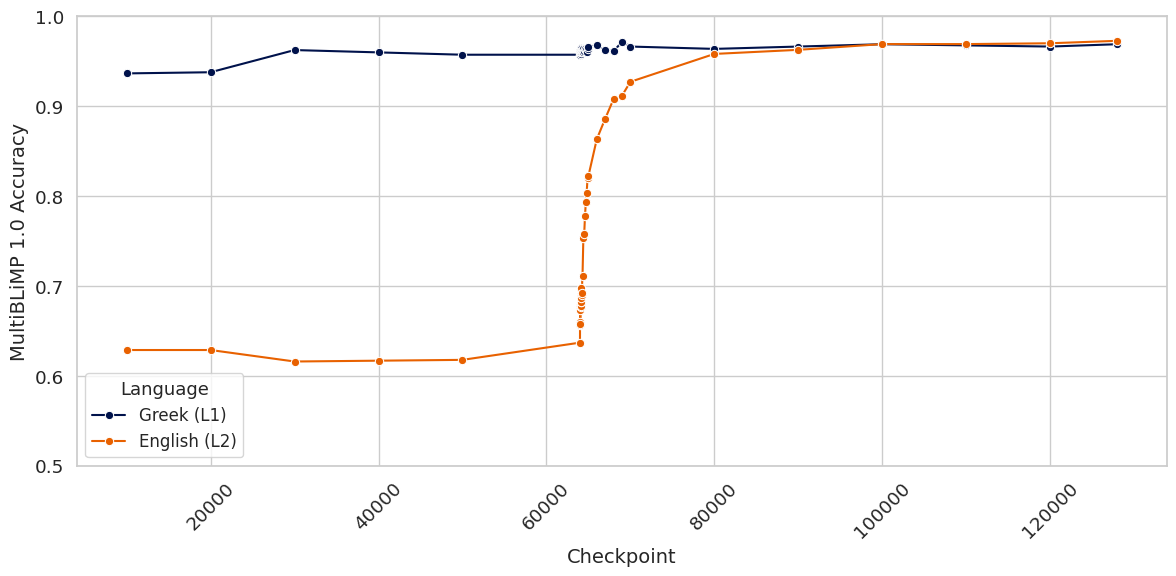

In [23]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_en_el_simultaneous,10000,eng,ell,simultaneous,0.9363636363636364,0.6286496350364964
catherinearnett/B-GPT_en_el_simultaneous,20000,eng,ell,simultaneous,0.9376623376623376,0.6286496350364964
catherinearnett/B-GPT_en_el_simultaneous,30000,eng,ell,simultaneous,0.9623376623376624,0.6158759124087592
catherinearnett/B-GPT_en_el_simultaneous,40000,eng,ell,simultaneous,0.9597402597402598,0.6167883211678832
catherinearnett/B-GPT_en_el_simultaneous,50000,eng,ell,simultaneous,0.9571428571428572,0.6177007299270073
catherinearnett/B-GPT_en_el_simultaneous,64000,eng,ell,simultaneous,0.9571428571428572,0.6368613138686131
catherinearnett/B-GPT_en_el_simultaneous,64010,eng,ell,simultaneous,0.9571428571428572,0.676094890510949
catherinearnett/B-GPT_en_el_simultaneous,64020,eng,ell,simultaneous,0.9597402597402598,0.6596715328467153
catherinearnett/B-GPT_en_el_simultaneous,64030,eng,ell,simultaneous,0.9597402597402598,0.656934306569343
catherinearnett/B-GPT_en_el_simultaneous,64040,eng,ell,simultaneous,0.9597402597402598,0.6578467153284672
catherinearnett/B-GPT_en_el_simultaneous,64050,eng,ell,simultaneous,0.961038961038961,0.6733576642335767
catherinearnett/B-GPT_en_el_simultaneous,64060,eng,ell,simultaneous,0.961038961038961,0.6779197080291971
catherinearnett/B-GPT_en_el_simultaneous,64070,eng,ell,simultaneous,0.9597402597402598,0.676094890510949
catherinearnett/B-GPT_en_el_simultaneous,64080,eng,ell,simultaneous,0.9584415584415584,0.6815693430656934
catherinearnett/B-GPT_en_el_simultaneous,64090,eng,ell,simultaneous,0.9584415584415584,0.6779197080291971
catherinearnett/B-GPT_en_el_simultaneous,64100,eng,ell,simultaneous,0.9597402597402598,0.6833941605839416
catherinearnett/B-GPT_en_el_simultaneous,64110,eng,ell,simultaneous,0.9623376623376624,0.6815693430656934
catherinearnett/B-GPT_en_el_simultaneous,64120,eng,ell,simultaneous,0.961038961038961,0.6824817518248175
catherinearnett/B-GPT_en_el_simultaneous,64130,eng,ell,simultaneous,0.9636363636363636,0.6879562043795621
catherinearnett/B-GPT_en_el_simultaneous,64140,eng,ell,simultaneous,0.964935064935065,0.6897810218978102
catherinearnett/B-GPT_en_el_simultaneous,64150,eng,ell,simultaneous,0.9636363636363636,0.6961678832116789
catherinearnett/B-GPT_en_el_simultaneous,64160,eng,ell,simultaneous,0.961038961038961,0.697992700729927
catherinearnett/B-GPT_en_el_simultaneous,64170,eng,ell,simultaneous,0.9597402597402598,0.6897810218978102
catherinearnett/B-GPT_en_el_simultaneous,64180,eng,ell,simultaneous,0.9597402597402598,0.6861313868613139
catherinearnett/B-GPT_en_el_simultaneous,64190,eng,ell,simultaneous,0.9597402597402598,0.6897810218978102
catherinearnett/B-GPT_en_el_simultaneous,64200,eng,ell,simultaneous,0.961038961038961,0.6925182481751825
catherinearnett/B-GPT_en_el_simultaneous,64300,eng,ell,simultaneous,0.9597402597402598,0.7107664233576643
catherinearnett/B-GPT_en_el_simultaneous,64400,eng,ell,simultaneous,0.9636363636363636,0.7527372262773723
catherinearnett/B-GPT_en_el_simultaneous,64500,eng,ell,simultaneous,0.961038961038961,0.7572992700729927
catherinearnett/B-GPT_en_el_simultaneous,64600,eng,ell,simultaneous,0.9636363636363636,0.7782846715328468
catherinearnett/B-GPT_en_el_simultaneous,64700,eng,ell,simultaneous,0.9623376623376624,0.7937956204379562
catherinearnett/B-GPT_en_el_simultaneous,64800,eng,ell,simultaneous,0.9597402597402598,0.8038321167883211
catherinearnett/B-GPT_en_el_simultaneous,64900,eng,ell,simultaneous,0.9636363636363636,0.8202554744525548
catherinearnett/B-GPT_en_el_simultaneous,65000,eng,ell,simultaneous,0.9662337662337662,0.8220802919708029
catherinearnett/B-GPT_en_el_simultaneous,66000,eng,ell,simultaneous,0.9675324675324676,0.8631386861313869
catherinearnett/B-GPT_en_el_simultaneous,67000,eng,ell,simultaneous,0.9623376623376624,0.8859489051094891
catherinearnett/B-GPT_en_el_simultaneous,68000,eng,ell,simultaneous,0.961038961038961,0.9078467153284672
catherinearnett/B-GPT_en_el_simultaneous,69000,eng,ell,simultaneous,0.9714285714285714,0.9114963503649635
catherinearnett/B-GPT_en_el_simultaneous,70000,eng,ell,simultaneous,0.9662337662337662,0.927007299270073
catherinearnett/B-GPT_en_el_simultaneous,80000,eng,ell,simultaneous,0.9636363636363636,0.958029197080292
catherinearnett/B-GPT_en_el_simultaneous,90000,eng,ell,simultaneous,0.9662337662337662,0.9625912408759124
catherinearnett/B-GPT_en_el_simultaneous,100000,eng,ell,simultaneous,0.9688311688311688,0.968978102189781
catherinearnett/B-GPT_en_el_simultaneous,110000,eng,ell,simultaneous,0.9675324675324676,0.968978102189781
catherinearnett/B-GPT_en_el_simultaneous,120000,eng,ell,simultaneous,0.9662337662337662,0.9698905109489051
catherinearnett/B-GPT_en_el_simultaneous,128000,eng,ell,simultaneous,0.9688311688311688,0.9726277372262774

"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "Greek (L1)", "l2_acc": "English (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "Greek (L1)":"#00124B",
    "English (L2)": "#E86100",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_en_el_simultaneous.png")
plt.show()






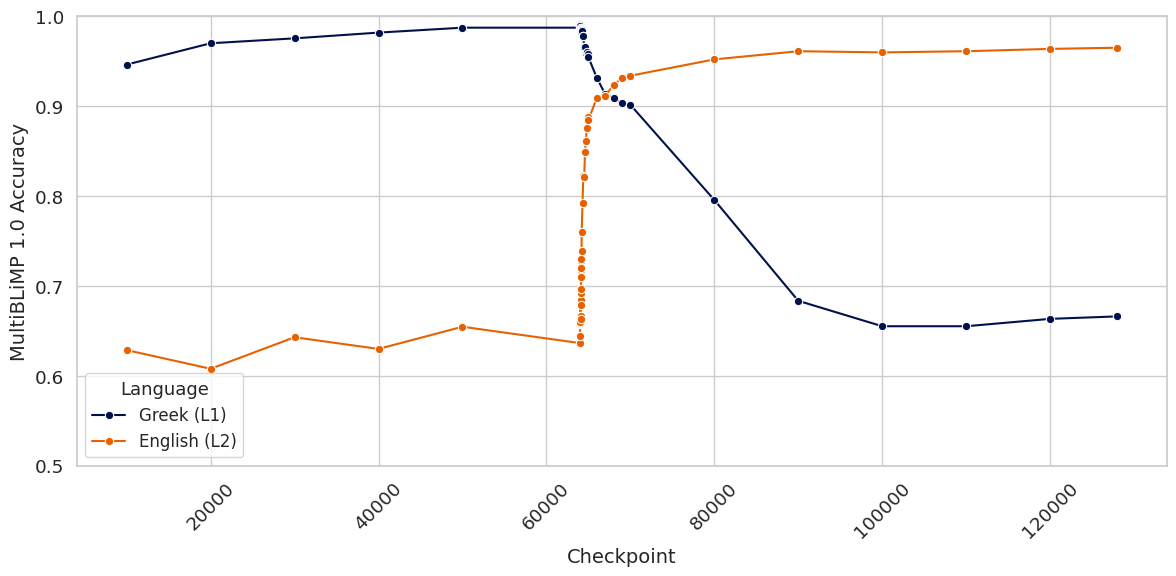

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_el_en_sequential,10000,ell,eng,sequential,0.9461678832116789,0.6285714285714286
catherinearnett/B-GPT_el_en_sequential,20000,ell,eng,sequential,0.9698905109489051,0.6077922077922078
catherinearnett/B-GPT_el_en_sequential,30000,ell,eng,sequential,0.9753649635036497,0.6428571428571429
catherinearnett/B-GPT_el_en_sequential,40000,ell,eng,sequential,0.9817518248175182,0.6298701298701299
catherinearnett/B-GPT_el_en_sequential,50000,ell,eng,sequential,0.9872262773722628,0.6545454545454545
catherinearnett/B-GPT_el_en_sequential,64000,ell,eng,sequential,0.9872262773722628,0.6363636363636364
catherinearnett/B-GPT_el_en_sequential,64010,ell,eng,sequential,0.9890510948905109,0.6441558441558441
catherinearnett/B-GPT_el_en_sequential,64020,ell,eng,sequential,0.9908759124087592,0.6597402597402597
catherinearnett/B-GPT_el_en_sequential,64030,ell,eng,sequential,0.989963503649635,0.6662337662337663
catherinearnett/B-GPT_el_en_sequential,64040,ell,eng,sequential,0.989963503649635,0.6571428571428571
catherinearnett/B-GPT_el_en_sequential,64050,ell,eng,sequential,0.989963503649635,0.6584415584415585
catherinearnett/B-GPT_el_en_sequential,64060,ell,eng,sequential,0.9890510948905109,0.6597402597402597
catherinearnett/B-GPT_el_en_sequential,64070,ell,eng,sequential,0.9872262773722628,0.6844155844155844
catherinearnett/B-GPT_el_en_sequential,64080,ell,eng,sequential,0.9854014598540146,0.6662337662337663
catherinearnett/B-GPT_el_en_sequential,64090,ell,eng,sequential,0.9872262773722628,0.6636363636363637
catherinearnett/B-GPT_el_en_sequential,64100,ell,eng,sequential,0.9863138686131386,0.6792207792207792
catherinearnett/B-GPT_el_en_sequential,64110,ell,eng,sequential,0.9872262773722628,0.6922077922077922
catherinearnett/B-GPT_el_en_sequential,64120,ell,eng,sequential,0.9863138686131386,0.6961038961038961
catherinearnett/B-GPT_el_en_sequential,64130,ell,eng,sequential,0.9854014598540146,0.7181818181818181
catherinearnett/B-GPT_el_en_sequential,64140,ell,eng,sequential,0.9863138686131386,0.7103896103896103
catherinearnett/B-GPT_el_en_sequential,64150,ell,eng,sequential,0.9844890510948905,0.7233766233766233
catherinearnett/B-GPT_el_en_sequential,64160,ell,eng,sequential,0.9844890510948905,0.7272727272727273
catherinearnett/B-GPT_el_en_sequential,64170,ell,eng,sequential,0.9835766423357665,0.7194805194805195
catherinearnett/B-GPT_el_en_sequential,64180,ell,eng,sequential,0.9835766423357665,0.7298701298701299
catherinearnett/B-GPT_el_en_sequential,64190,ell,eng,sequential,0.9844890510948905,0.7389610389610389
catherinearnett/B-GPT_el_en_sequential,64200,ell,eng,sequential,0.9835766423357665,0.7597402597402597
catherinearnett/B-GPT_el_en_sequential,64300,ell,eng,sequential,0.9781021897810219,0.7922077922077922
catherinearnett/B-GPT_el_en_sequential,64400,ell,eng,sequential,0.9781021897810219,0.8220779220779221
catherinearnett/B-GPT_el_en_sequential,64500,ell,eng,sequential,0.9653284671532847,0.8207792207792208
catherinearnett/B-GPT_el_en_sequential,64600,ell,eng,sequential,0.9662408759124088,0.8493506493506493
catherinearnett/B-GPT_el_en_sequential,64700,ell,eng,sequential,0.958941605839416,0.861038961038961
catherinearnett/B-GPT_el_en_sequential,64800,ell,eng,sequential,0.9598540145985401,0.8753246753246753
catherinearnett/B-GPT_el_en_sequential,64900,ell,eng,sequential,0.958029197080292,0.8883116883116883
catherinearnett/B-GPT_el_en_sequential,65000,ell,eng,sequential,0.9543795620437956,0.8844155844155844
catherinearnett/B-GPT_el_en_sequential,66000,ell,eng,sequential,0.9315693430656934,0.9090909090909091
catherinearnett/B-GPT_el_en_sequential,67000,ell,eng,sequential,0.9133211678832117,0.9116883116883117
catherinearnett/B-GPT_el_en_sequential,68000,ell,eng,sequential,0.9087591240875912,0.9233766233766234
catherinearnett/B-GPT_el_en_sequential,69000,ell,eng,sequential,0.9032846715328468,0.9311688311688312
catherinearnett/B-GPT_el_en_sequential,70000,ell,eng,sequential,0.9014598540145985,0.9337662337662338
catherinearnett/B-GPT_el_en_sequential,80000,ell,eng,sequential,0.7956204379562044,0.951948051948052
catherinearnett/B-GPT_el_en_sequential,90000,ell,eng,sequential,0.6833941605839416,0.961038961038961
catherinearnett/B-GPT_el_en_sequential,100000,ell,eng,sequential,0.6551094890510949,0.9597402597402598
catherinearnett/B-GPT_el_en_sequential,110000,ell,eng,sequential,0.6551094890510949,0.961038961038961
catherinearnett/B-GPT_el_en_sequential,120000,ell,eng,sequential,0.6633211678832117,0.9636363636363636
catherinearnett/B-GPT_el_en_sequential,128000,ell,eng,sequential,0.666058394160584,0.964935064935065
"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "Greek (L1)", "l2_acc": "English (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "Greek (L1)":"#00124B",
    "English (L2)": "#E86100",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_el_en_sequential.png")
plt.show()


# English-Portuguese

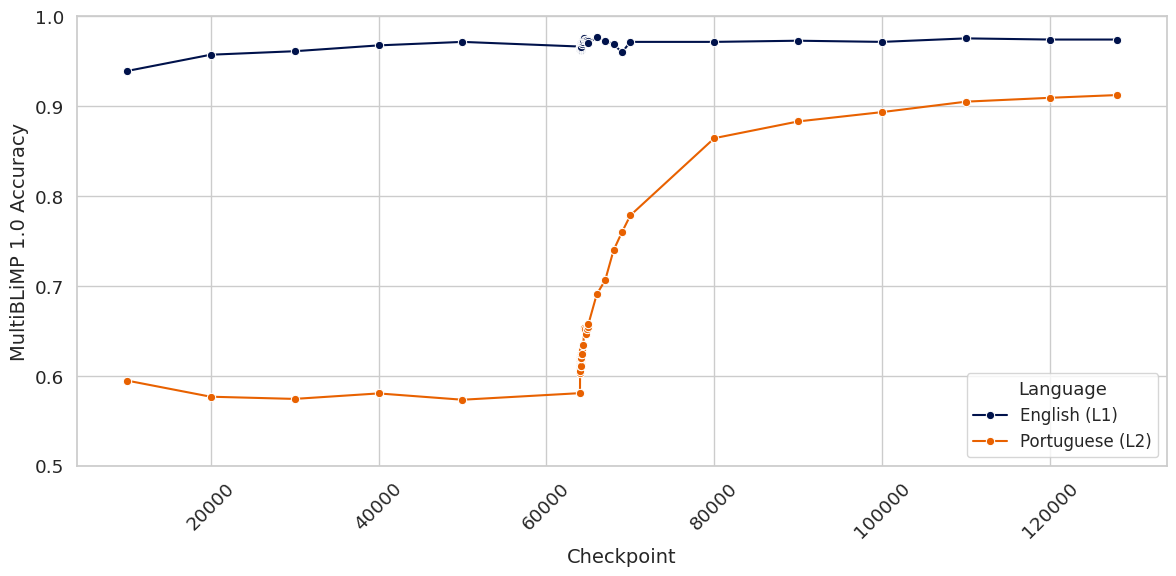

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_en_pl_simultaneous,10000,eng,pol,simultaneous,0.938961038961039,0.5947432762836186
catherinearnett/B-GPT_en_pl_simultaneous,20000,eng,pol,simultaneous,0.9571428571428572,0.5767114914425427
catherinearnett/B-GPT_en_pl_simultaneous,30000,eng,pol,simultaneous,0.961038961038961,0.5742665036674817
catherinearnett/B-GPT_en_pl_simultaneous,40000,eng,pol,simultaneous,0.9675324675324676,0.5803789731051344
catherinearnett/B-GPT_en_pl_simultaneous,50000,eng,pol,simultaneous,0.9714285714285714,0.5733496332518337
catherinearnett/B-GPT_en_pl_simultaneous,64000,eng,pol,simultaneous,0.9662337662337662,0.5806845965770171
catherinearnett/B-GPT_en_pl_simultaneous,64010,eng,pol,simultaneous,0.964935064935065,0.6033007334963325
catherinearnett/B-GPT_en_pl_simultaneous,64020,eng,pol,simultaneous,0.9636363636363636,0.60880195599022
catherinearnett/B-GPT_en_pl_simultaneous,64030,eng,pol,simultaneous,0.9636363636363636,0.6048288508557457
catherinearnett/B-GPT_en_pl_simultaneous,64040,eng,pol,simultaneous,0.9636363636363636,0.6118581907090465
catherinearnett/B-GPT_en_pl_simultaneous,64050,eng,pol,simultaneous,0.964935064935065,0.6213325183374083
catherinearnett/B-GPT_en_pl_simultaneous,64060,eng,pol,simultaneous,0.9662337662337662,0.6161369193154034
catherinearnett/B-GPT_en_pl_simultaneous,64070,eng,pol,simultaneous,0.9662337662337662,0.6179706601466992
catherinearnett/B-GPT_en_pl_simultaneous,64080,eng,pol,simultaneous,0.964935064935065,0.6146088019559902
catherinearnett/B-GPT_en_pl_simultaneous,64090,eng,pol,simultaneous,0.9623376623376624,0.6182762836185819
catherinearnett/B-GPT_en_pl_simultaneous,64100,eng,pol,simultaneous,0.9636363636363636,0.6225550122249389
catherinearnett/B-GPT_en_pl_simultaneous,64110,eng,pol,simultaneous,0.964935064935065,0.6240831295843521
catherinearnett/B-GPT_en_pl_simultaneous,64120,eng,pol,simultaneous,0.9662337662337662,0.6182762836185819
catherinearnett/B-GPT_en_pl_simultaneous,64130,eng,pol,simultaneous,0.9662337662337662,0.6106356968215159
catherinearnett/B-GPT_en_pl_simultaneous,64140,eng,pol,simultaneous,0.964935064935065,0.6231662591687042
catherinearnett/B-GPT_en_pl_simultaneous,64150,eng,pol,simultaneous,0.9675324675324676,0.6112469437652812
catherinearnett/B-GPT_en_pl_simultaneous,64160,eng,pol,simultaneous,0.9675324675324676,0.6198044009779952
catherinearnett/B-GPT_en_pl_simultaneous,64170,eng,pol,simultaneous,0.9701298701298702,0.6201100244498777
catherinearnett/B-GPT_en_pl_simultaneous,64180,eng,pol,simultaneous,0.9662337662337662,0.6240831295843521
catherinearnett/B-GPT_en_pl_simultaneous,64190,eng,pol,simultaneous,0.9688311688311688,0.628361858190709
catherinearnett/B-GPT_en_pl_simultaneous,64200,eng,pol,simultaneous,0.9714285714285714,0.6243887530562348
catherinearnett/B-GPT_en_pl_simultaneous,64300,eng,pol,simultaneous,0.9714285714285714,0.6347799511002445
catherinearnett/B-GPT_en_pl_simultaneous,64400,eng,pol,simultaneous,0.974025974025974,0.6341687041564792
catherinearnett/B-GPT_en_pl_simultaneous,64500,eng,pol,simultaneous,0.9753246753246754,0.6534229828850856
catherinearnett/B-GPT_en_pl_simultaneous,64600,eng,pol,simultaneous,0.974025974025974,0.6525061124694377
catherinearnett/B-GPT_en_pl_simultaneous,64700,eng,pol,simultaneous,0.974025974025974,0.6463936430317848
catherinearnett/B-GPT_en_pl_simultaneous,64800,eng,pol,simultaneous,0.974025974025974,0.6518948655256723
catherinearnett/B-GPT_en_pl_simultaneous,64900,eng,pol,simultaneous,0.9727272727272728,0.6546454767726161
catherinearnett/B-GPT_en_pl_simultaneous,65000,eng,pol,simultaneous,0.9701298701298702,0.65739608801956
catherinearnett/B-GPT_en_pl_simultaneous,66000,eng,pol,simultaneous,0.9766233766233766,0.6907090464547677
catherinearnett/B-GPT_en_pl_simultaneous,67000,eng,pol,simultaneous,0.9727272727272728,0.7062958435207825
catherinearnett/B-GPT_en_pl_simultaneous,68000,eng,pol,simultaneous,0.9688311688311688,0.7396088019559902
catherinearnett/B-GPT_en_pl_simultaneous,69000,eng,pol,simultaneous,0.9597402597402598,0.7597799511002445
catherinearnett/B-GPT_en_pl_simultaneous,70000,eng,pol,simultaneous,0.9714285714285714,0.7784229828850856
catherinearnett/B-GPT_en_pl_simultaneous,80000,eng,pol,simultaneous,0.9714285714285714,0.8643031784841075
catherinearnett/B-GPT_en_pl_simultaneous,90000,eng,pol,simultaneous,0.9727272727272728,0.8829462102689487
catherinearnett/B-GPT_en_pl_simultaneous,100000,eng,pol,simultaneous,0.9714285714285714,0.8933374083129584
catherinearnett/B-GPT_en_pl_simultaneous,110000,eng,pol,simultaneous,0.9753246753246754,0.9049511002444988
catherinearnett/B-GPT_en_pl_simultaneous,120000,eng,pol,simultaneous,0.974025974025974,0.9092298288508558
catherinearnett/B-GPT_en_pl_simultaneous,128000,eng,pol,simultaneous,0.974025974025974,0.9122860635696821
"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "English (L1)", "l2_acc": "Portuguese (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "English (L1)":"#00124B",
    "Portuguese (L2)": "#E86100",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_en_pl_simultaneous.png")
plt.show()


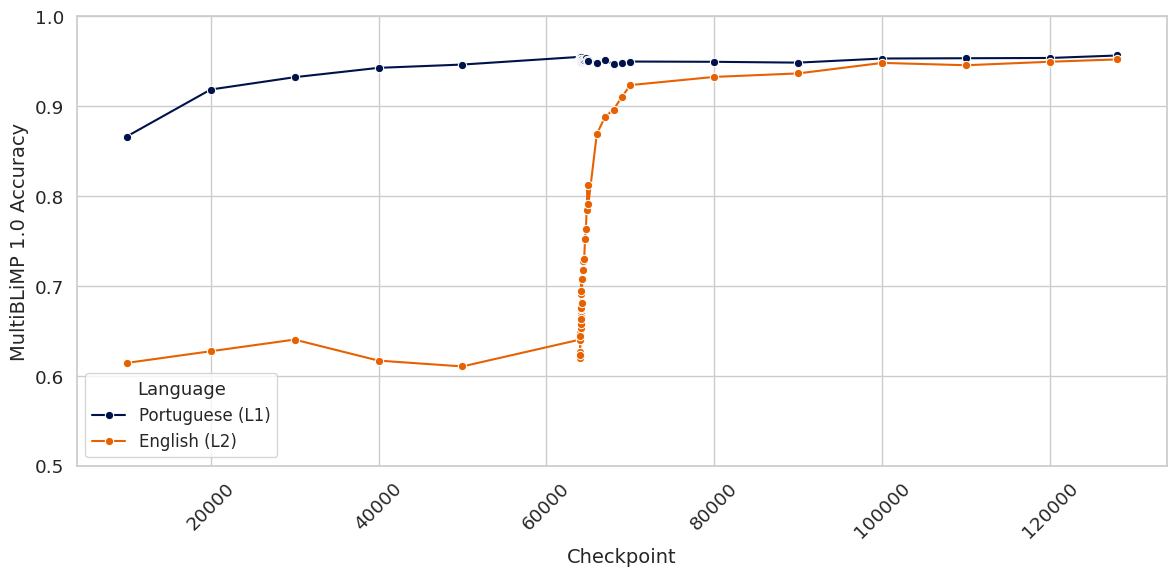

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_pl_en_simultaneous,10000,pol,eng,simultaneous,0.8661369193154034,0.6142857142857143
catherinearnett/B-GPT_pl_en_simultaneous,20000,pol,eng,simultaneous,0.918398533007335,0.6272727272727273
catherinearnett/B-GPT_pl_en_simultaneous,30000,pol,eng,simultaneous,0.9321515892420538,0.6402597402597403
catherinearnett/B-GPT_pl_en_simultaneous,40000,pol,eng,simultaneous,0.9425427872860636,0.6168831168831169
catherinearnett/B-GPT_pl_en_simultaneous,50000,pol,eng,simultaneous,0.9462102689486552,0.6103896103896104
catherinearnett/B-GPT_pl_en_simultaneous,64000,pol,eng,simultaneous,0.9547677261613692,0.6402597402597403
catherinearnett/B-GPT_pl_en_simultaneous,64010,pol,eng,simultaneous,0.9526283618581907,0.625974025974026
catherinearnett/B-GPT_pl_en_simultaneous,64020,pol,eng,simultaneous,0.9538508557457213,0.6194805194805195
catherinearnett/B-GPT_pl_en_simultaneous,64030,pol,eng,simultaneous,0.9538508557457213,0.6233766233766234
catherinearnett/B-GPT_pl_en_simultaneous,64040,pol,eng,simultaneous,0.953239608801956,0.6467532467532467
catherinearnett/B-GPT_pl_en_simultaneous,64050,pol,eng,simultaneous,0.9535452322738386,0.6480519480519481
catherinearnett/B-GPT_pl_en_simultaneous,64060,pol,eng,simultaneous,0.953239608801956,0.6441558441558441
catherinearnett/B-GPT_pl_en_simultaneous,64070,pol,eng,simultaneous,0.9526283618581907,0.6662337662337663
catherinearnett/B-GPT_pl_en_simultaneous,64080,pol,eng,simultaneous,0.9547677261613692,0.6714285714285714
catherinearnett/B-GPT_pl_en_simultaneous,64090,pol,eng,simultaneous,0.9520171149144254,0.6649350649350649
catherinearnett/B-GPT_pl_en_simultaneous,64100,pol,eng,simultaneous,0.9526283618581907,0.6545454545454545
catherinearnett/B-GPT_pl_en_simultaneous,64110,pol,eng,simultaneous,0.9498777506112469,0.6532467532467533
catherinearnett/B-GPT_pl_en_simultaneous,64120,pol,eng,simultaneous,0.9486552567237164,0.674025974025974
catherinearnett/B-GPT_pl_en_simultaneous,64130,pol,eng,simultaneous,0.9495721271393643,0.6779220779220779
catherinearnett/B-GPT_pl_en_simultaneous,64140,pol,eng,simultaneous,0.9504889975550123,0.6571428571428571
catherinearnett/B-GPT_pl_en_simultaneous,64150,pol,eng,simultaneous,0.9517114914425427,0.6636363636363637
catherinearnett/B-GPT_pl_en_simultaneous,64160,pol,eng,simultaneous,0.9501833740831296,0.6753246753246753
catherinearnett/B-GPT_pl_en_simultaneous,64170,pol,eng,simultaneous,0.9520171149144254,0.6909090909090909
catherinearnett/B-GPT_pl_en_simultaneous,64180,pol,eng,simultaneous,0.9507946210268948,0.6948051948051948
catherinearnett/B-GPT_pl_en_simultaneous,64190,pol,eng,simultaneous,0.9511002444987775,0.7077922077922078
catherinearnett/B-GPT_pl_en_simultaneous,64200,pol,eng,simultaneous,0.9529339853300733,0.6805194805194805
catherinearnett/B-GPT_pl_en_simultaneous,64300,pol,eng,simultaneous,0.9507946210268948,0.7181818181818181
catherinearnett/B-GPT_pl_en_simultaneous,64400,pol,eng,simultaneous,0.9507946210268948,0.7272727272727273
catherinearnett/B-GPT_pl_en_simultaneous,64500,pol,eng,simultaneous,0.9517114914425427,0.7298701298701299
catherinearnett/B-GPT_pl_en_simultaneous,64600,pol,eng,simultaneous,0.9520171149144254,0.7519480519480519
catherinearnett/B-GPT_pl_en_simultaneous,64700,pol,eng,simultaneous,0.9538508557457213,0.7636363636363637
catherinearnett/B-GPT_pl_en_simultaneous,64800,pol,eng,simultaneous,0.9514058679706602,0.7844155844155845
catherinearnett/B-GPT_pl_en_simultaneous,64900,pol,eng,simultaneous,0.9514058679706602,0.8116883116883117
catherinearnett/B-GPT_pl_en_simultaneous,65000,pol,eng,simultaneous,0.9504889975550123,0.7909090909090909
catherinearnett/B-GPT_pl_en_simultaneous,66000,pol,eng,simultaneous,0.9483496332518337,0.8688311688311688
catherinearnett/B-GPT_pl_en_simultaneous,67000,pol,eng,simultaneous,0.9511002444987775,0.8883116883116883
catherinearnett/B-GPT_pl_en_simultaneous,68000,pol,eng,simultaneous,0.9465158924205379,0.8961038961038961
catherinearnett/B-GPT_pl_en_simultaneous,69000,pol,eng,simultaneous,0.9474327628361858,0.9103896103896104
catherinearnett/B-GPT_pl_en_simultaneous,70000,pol,eng,simultaneous,0.9495721271393643,0.9233766233766234
catherinearnett/B-GPT_pl_en_simultaneous,80000,pol,eng,simultaneous,0.9492665036674817,0.9324675324675324
catherinearnett/B-GPT_pl_en_simultaneous,90000,pol,eng,simultaneous,0.9483496332518337,0.9363636363636364
catherinearnett/B-GPT_pl_en_simultaneous,100000,pol,eng,simultaneous,0.9529339853300733,0.948051948051948
catherinearnett/B-GPT_pl_en_simultaneous,110000,pol,eng,simultaneous,0.953239608801956,0.9454545454545454
catherinearnett/B-GPT_pl_en_simultaneous,120000,pol,eng,simultaneous,0.9535452322738386,0.9493506493506494
catherinearnett/B-GPT_pl_en_simultaneous,128000,pol,eng,simultaneous,0.9562958435207825,0.951948051948052

"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "Portuguese (L1)", "l2_acc": "English (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "Portuguese (L1)":"#00124B",
    "English (L2)": "#E86100",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_pl_en_simultaneous.png")
plt.show()

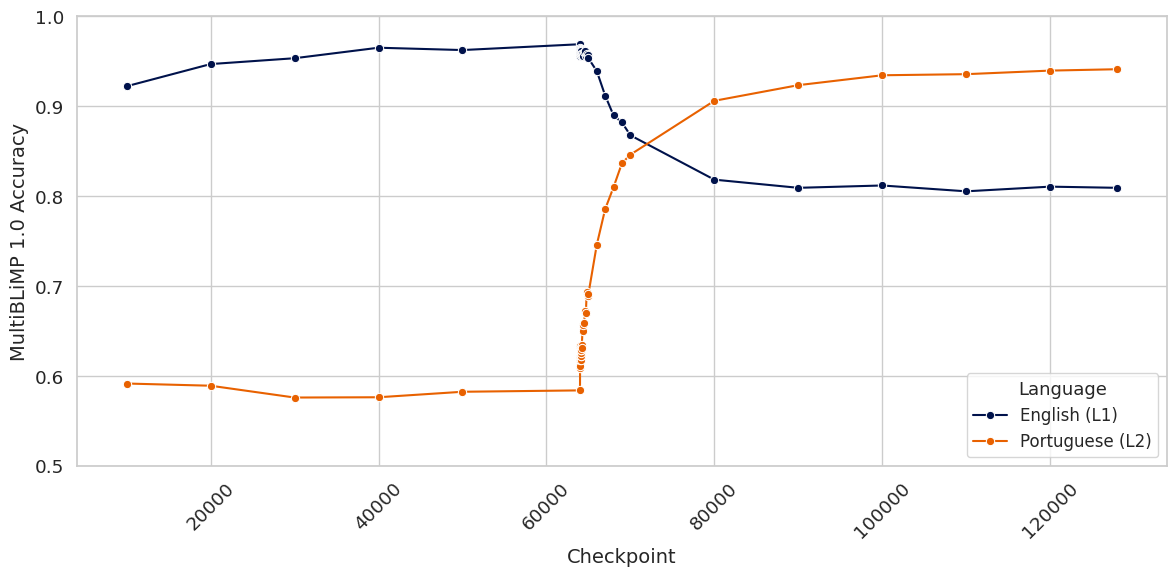

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
catherinearnett/B-GPT_en_pl_sequential,10000,eng,pol,sequential,0.922077922077922,0.5913814180929096
catherinearnett/B-GPT_en_pl_sequential,20000,eng,pol,sequential,0.9467532467532468,0.5889364303178484
catherinearnett/B-GPT_en_pl_sequential,30000,eng,pol,sequential,0.9532467532467532,0.5757946210268948
catherinearnett/B-GPT_en_pl_sequential,40000,eng,pol,sequential,0.964935064935065,0.5761002444987775
catherinearnett/B-GPT_en_pl_sequential,50000,eng,pol,sequential,0.9623376623376624,0.5822127139364304
catherinearnett/B-GPT_en_pl_sequential,64000,eng,pol,sequential,0.9688311688311688,0.5837408312958435
catherinearnett/B-GPT_en_pl_sequential,64010,eng,pol,sequential,0.964935064935065,0.6081907090464548
catherinearnett/B-GPT_en_pl_sequential,64020,eng,pol,sequential,0.9636363636363636,0.6106356968215159
catherinearnett/B-GPT_en_pl_sequential,64030,eng,pol,sequential,0.961038961038961,0.6198044009779952
catherinearnett/B-GPT_en_pl_sequential,64040,eng,pol,sequential,0.9597402597402598,0.6332518337408313
catherinearnett/B-GPT_en_pl_sequential,64050,eng,pol,sequential,0.9571428571428572,0.6213325183374083
catherinearnett/B-GPT_en_pl_sequential,64060,eng,pol,sequential,0.9558441558441558,0.6176650366748166
catherinearnett/B-GPT_en_pl_sequential,64070,eng,pol,sequential,0.9571428571428572,0.6271393643031785
catherinearnett/B-GPT_en_pl_sequential,64080,eng,pol,sequential,0.9636363636363636,0.6176650366748166
catherinearnett/B-GPT_en_pl_sequential,64090,eng,pol,sequential,0.961038961038961,0.621638141809291
catherinearnett/B-GPT_en_pl_sequential,64100,eng,pol,sequential,0.9623376623376624,0.625
catherinearnett/B-GPT_en_pl_sequential,64110,eng,pol,sequential,0.9623376623376624,0.6280562347188264
catherinearnett/B-GPT_en_pl_sequential,64120,eng,pol,sequential,0.9623376623376624,0.6225550122249389
catherinearnett/B-GPT_en_pl_sequential,64130,eng,pol,sequential,0.961038961038961,0.6256112469437652
catherinearnett/B-GPT_en_pl_sequential,64140,eng,pol,sequential,0.9597402597402598,0.6286674816625917
catherinearnett/B-GPT_en_pl_sequential,64150,eng,pol,sequential,0.961038961038961,0.6295843520782396
catherinearnett/B-GPT_en_pl_sequential,64160,eng,pol,sequential,0.9571428571428572,0.628361858190709
catherinearnett/B-GPT_en_pl_sequential,64170,eng,pol,sequential,0.9584415584415584,0.6317237163814181
catherinearnett/B-GPT_en_pl_sequential,64180,eng,pol,sequential,0.9571428571428572,0.628361858190709
catherinearnett/B-GPT_en_pl_sequential,64190,eng,pol,sequential,0.9571428571428572,0.6344743276283619
catherinearnett/B-GPT_en_pl_sequential,64200,eng,pol,sequential,0.9584415584415584,0.6311124694376528
catherinearnett/B-GPT_en_pl_sequential,64300,eng,pol,sequential,0.9571428571428572,0.6497555012224939
catherinearnett/B-GPT_en_pl_sequential,64400,eng,pol,sequential,0.9558441558441558,0.6567848410757946
catherinearnett/B-GPT_en_pl_sequential,64500,eng,pol,sequential,0.9597402597402598,0.6589242053789731
catherinearnett/B-GPT_en_pl_sequential,64600,eng,pol,sequential,0.961038961038961,0.6723716381418093
catherinearnett/B-GPT_en_pl_sequential,64700,eng,pol,sequential,0.9558441558441558,0.6699266503667481
catherinearnett/B-GPT_en_pl_sequential,64800,eng,pol,sequential,0.9584415584415584,0.6931540342298288
catherinearnett/B-GPT_en_pl_sequential,64900,eng,pol,sequential,0.9571428571428572,0.6888753056234719
catherinearnett/B-GPT_en_pl_sequential,65000,eng,pol,sequential,0.9532467532467532,0.6907090464547677
catherinearnett/B-GPT_en_pl_sequential,66000,eng,pol,sequential,0.938961038961039,0.7457212713936431
catherinearnett/B-GPT_en_pl_sequential,67000,eng,pol,sequential,0.9116883116883117,0.7854523227383863
catherinearnett/B-GPT_en_pl_sequential,68000,eng,pol,sequential,0.8896103896103896,0.8099022004889975
catherinearnett/B-GPT_en_pl_sequential,69000,eng,pol,sequential,0.8818181818181818,0.8364914425427873
catherinearnett/B-GPT_en_pl_sequential,70000,eng,pol,sequential,0.8675324675324675,0.8459657701711492
catherinearnett/B-GPT_en_pl_sequential,80000,eng,pol,sequential,0.8181818181818182,0.9058679706601467
catherinearnett/B-GPT_en_pl_sequential,90000,eng,pol,sequential,0.8090909090909091,0.9232885085574573
catherinearnett/B-GPT_en_pl_sequential,100000,eng,pol,sequential,0.8116883116883117,0.9342909535452323
catherinearnett/B-GPT_en_pl_sequential,110000,eng,pol,sequential,0.8051948051948052,0.9355134474327629
catherinearnett/B-GPT_en_pl_sequential,120000,eng,pol,sequential,0.8103896103896104,0.9394865525672371
catherinearnett/B-GPT_en_pl_sequential,128000,eng,pol,sequential,0.8090909090909091,0.9410146699266504
"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "English (L1)", "l2_acc": "Portuguese (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "English (L1)":"#00124B",
    "Portuguese (L2)": "#E86100",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_en_pl_sequential.png")
plt.show()



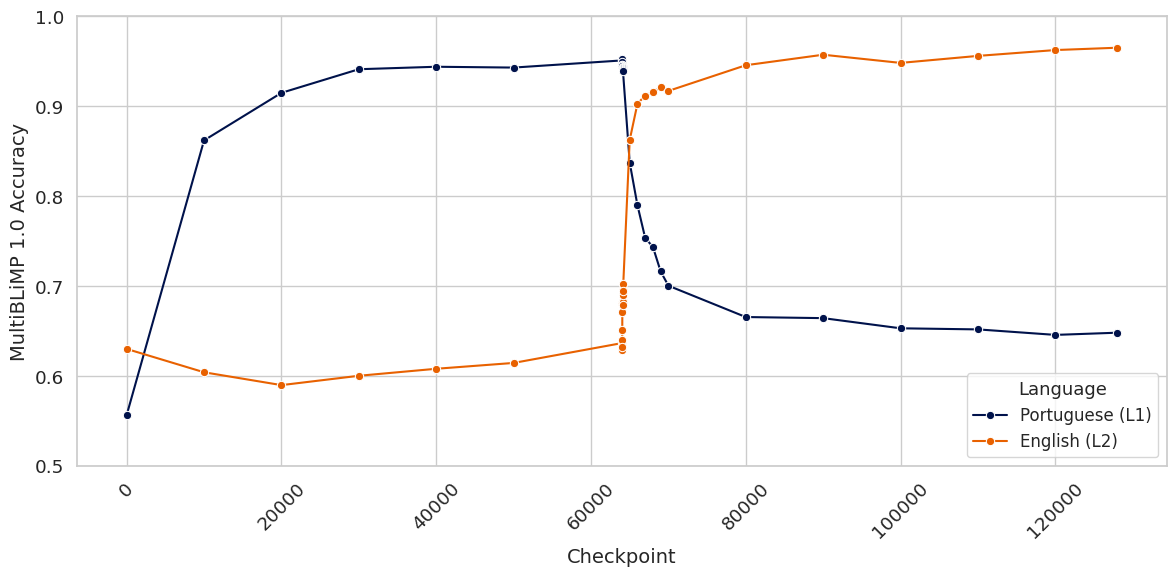

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Your data as a CSV string
from io import StringIO

data = """
model,checkpoint,l1,l2,biling_cond,l1_acc,l2_acc
atherinearnett/B-GPT_pl_en_sequential,0,pol,eng,sequential,0.5562347188264058,0.6298701298701299
catherinearnett/B-GPT_pl_en_sequential,10000,pol,eng,sequential,0.8618581907090465,0.6038961038961039
catherinearnett/B-GPT_pl_en_sequential,20000,pol,eng,sequential,0.9147310513447433,0.5896103896103896
catherinearnett/B-GPT_pl_en_sequential,30000,pol,eng,sequential,0.9410146699266504,0.6
catherinearnett/B-GPT_pl_en_sequential,40000,pol,eng,sequential,0.9437652811735942,0.6077922077922078
catherinearnett/B-GPT_pl_en_sequential,50000,pol,eng,sequential,0.9428484107579462,0.6142857142857143
catherinearnett/B-GPT_pl_en_sequential,64000,pol,eng,sequential,0.9507946210268948,0.6363636363636364
catherinearnett/B-GPT_pl_en_sequential,64010,pol,eng,sequential,0.9526283618581907,0.6285714285714286
catherinearnett/B-GPT_pl_en_sequential,64020,pol,eng,sequential,0.948960880195599,0.6402597402597403
catherinearnett/B-GPT_pl_en_sequential,64030,pol,eng,sequential,0.9452933985330073,0.6324675324675325
catherinearnett/B-GPT_pl_en_sequential,64040,pol,eng,sequential,0.9459046454767727,0.6506493506493507
catherinearnett/B-GPT_pl_en_sequential,64050,pol,eng,sequential,0.9440709046454768,0.6805194805194805
catherinearnett/B-GPT_pl_en_sequential,64060,pol,eng,sequential,0.9440709046454768,0.6714285714285714
catherinearnett/B-GPT_pl_en_sequential,64070,pol,eng,sequential,0.9437652811735942,0.6831168831168831
catherinearnett/B-GPT_pl_en_sequential,64080,pol,eng,sequential,0.9419315403422983,0.6818181818181818
catherinearnett/B-GPT_pl_en_sequential,64090,pol,eng,sequential,0.9419315403422983,0.6961038961038961
catherinearnett/B-GPT_pl_en_sequential,64100,pol,eng,sequential,0.9428484107579462,0.6792207792207792
catherinearnett/B-GPT_pl_en_sequential,64110,pol,eng,sequential,0.9407090464547677,0.6896103896103896
catherinearnett/B-GPT_pl_en_sequential,64120,pol,eng,sequential,0.940403422982885,0.7025974025974026
catherinearnett/B-GPT_pl_en_sequential,64130,pol,eng,sequential,0.9388753056234719,0.6948051948051948
catherinearnett/B-GPT_pl_en_sequential,65000,pol,eng,sequential,0.8371026894865525,0.8623376623376623
catherinearnett/B-GPT_pl_en_sequential,66000,pol,eng,sequential,0.7897310513447433,0.9025974025974026
catherinearnett/B-GPT_pl_en_sequential,67000,pol,eng,sequential,0.753361858190709,0.9116883116883117
catherinearnett/B-GPT_pl_en_sequential,68000,pol,eng,sequential,0.7432762836185819,0.9155844155844156
catherinearnett/B-GPT_pl_en_sequential,69000,pol,eng,sequential,0.7160757946210269,0.9207792207792208
catherinearnett/B-GPT_pl_en_sequential,70000,pol,eng,sequential,0.7001833740831296,0.9168831168831169
catherinearnett/B-GPT_pl_en_sequential,80000,pol,eng,sequential,0.6653422982885085,0.9454545454545454
catherinearnett/B-GPT_pl_en_sequential,90000,pol,eng,sequential,0.664119804400978,0.9571428571428572
catherinearnett/B-GPT_pl_en_sequential,100000,pol,eng,sequential,0.6528117359413202,0.948051948051948
catherinearnett/B-GPT_pl_en_sequential,110000,pol,eng,sequential,0.6515892420537898,0.9558441558441558
catherinearnett/B-GPT_pl_en_sequential,120000,pol,eng,sequential,0.6454767726161369,0.9623376623376624
catherinearnett/B-GPT_pl_en_sequential,128000,pol,eng,sequential,0.6479217603911981,0.964935064935065
"""

# Load and melt the dataframe
df = pd.read_csv(StringIO(data))
df_melted = df.melt(id_vars=["checkpoint"], value_vars=["l1_acc", "l2_acc"],
                    var_name="Language", value_name="Accuracy")
lang_map = {"l1_acc": "Portuguese (L1)", "l2_acc": "English (L2)"}
df_melted["Language"] = df_melted["Language"].map(lang_map)

# Set font and colors
rcParams['font.family'] = 'DejaVu Serif'  # Change to a preferred font (e.g., 'Times New Roman', 'Arial', etc.)

# Custom color palette
palette = {
    "Portuguese (L1)":"#00124B",
    "English (L2)": "#E86100",
}

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="checkpoint", y="Accuracy",
             hue="Language", marker="o", palette=palette)
#plt.title("B-GPT Accuracy Over Training (English-Dutch, Simultaneous)", fontsize=16, fontweight='bold')
plt.xlabel("Checkpoint", fontsize=14)
plt.ylabel("MultiBLiMP 1.0 Accuracy", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Language", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("B-GPT_pl_en_sequential.png")
plt.show()
